**<h1 align="center" > Hotel Customer Segmentation</h1>**
**<h2 align="center" > Business Cases with Data Science - Case 1</h2>**


**Group members:**<br> 
Chloé Deschanel - 20240693 <br>
Diogo Carvalho - 20240694 <br>
Ingrid Lopez - 20240692 <br>
Ruben Marques- 20240352

# Table of Contents

* [1. Data Exploration](#chapter1)
    * [1.1. Imports](#sub-section-1_1)
    * [1.2. Loading Data](#sub-section-1_2)
    * [1.3. Initial Analysis](#sub-section-1_3)
        * [1.3.1. Types](#sub-section-1_3_1)
        * [1.3.2. Missing Values](#sub-section-1_3_2)
        * [1.3.3. Duplicates](#sub-section-1_3_3)
        * [1.3.4. Data Statistics](#sub-section-1_3_4)
    * [1.4. Individual Variable Analysis](#sub-section-1_4)
        * [1.4.1. Numerical Variables](#sub-section-1_4_1)
            * [1.4.1.1. Overview](#sub-section-1_4_1_1)
        * [1.4.2. Categorical Variables](#sub-section-1_4_2)
        * [1.4.3. Binary Variables](#sub-section-1_4_3)

<a class="anchor" id="chapter1"></a>

# 1. Data Exploration

</a>

<a class="anchor" id="sub-section-1_1"></a>

## 1.1. Imports

</a>

In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<a class="anchor" id="sub-section-1_2"></a>

## 1.2. Loading Data

</a>

In [99]:
data = pd.read_csv("../Data/Case1_HotelCustomerSegmentation.csv", sep=";")

In [100]:
# Display all columns
pd.set_option('display.max_columns', None)
data.sample(5)

,ID,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DistributionChannel,MarketSegment,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
89607,89608,RUS,19.0,221,0x9463DB4E1BFE475E9990C9DF355D6E5B9F3456EC3078...,0x6E3381BEB80B2977858FFE41B681B8C0296FF53DBE17...,0,0.0,0.0,0,0,0,0,0,Travel Agent/Operator,Other,0,0,0,0,0,0,0,0,0,0,0,0,0
40540,40541,DEU,57.0,708,0x915EC182D26DADB0A9CDA3AEB95F97E00C8D5759C213...,0x03FEEE9093913CE6E7FFF0020F16EFD7D7A329834724...,19,428.0,23.0,0,0,1,2,2,Travel Agent/Operator,Other,0,0,0,0,0,0,0,1,0,0,0,0,1
57634,57635,FRA,44.0,508,0x051CBEC8268B73B1BB80F02731CAE55A5FEA4EFA088E...,0x2C4B2189B408788225CC05DED74D53E36753AE01BC19...,0,0.0,0.0,0,0,0,0,0,Travel Agent/Operator,Other,0,0,0,0,0,0,0,1,0,0,0,0,0
18603,18604,DEU,54.0,1063,0x211C0ABA2873757E8DDDD688C5EED36B0D581CB91B04...,0xCB3F25046A3F64709B01200FA2D83C6075490F342048...,0,95.0,25.0,0,0,1,1,1,Travel Agent/Operator,Other,0,0,0,0,0,0,0,1,0,0,0,0,0
94855,94856,FRA,52.0,174,0x14067C04ECF71D5D4E4EBD36DFB121E9FE8E403E9669...,0x1D4DB36726C6EB3A97EE3BC969A26236EC492F9B4B27...,0,0.0,0.0,0,0,0,0,0,Direct,Direct,0,0,0,0,0,0,0,1,0,0,1,0,1


In [101]:
# Set ID as index
data.set_index('ID', inplace=True)

| #   | Column Name        | Description                                                                                       |
|:----|:-------------------|:--------------------------------------------------------------------------------------------------|
| 1   | ID        | Customer ID customer. |
| 2   | Nationality    | Nationality of the customer in ISO 3166-1 (Alpha 3) format. |
| 3   | Age       | Age of the customer. |
| 4   | DaysSinceCreation       | Number of elapsed days since the customer was created. |
| 5   | NameHash | Hash of the customer's name. |
| 6   | DocIDHash | Hash of the customer’s personal document identification number (usually a passport or ID card). |
| 7   | AverageLeadTime | Average number of days before arrival date the customer makes bookings. |
| 8   | LodgingRevenue | Total amount of lodging revenue paid by the customer so far. |
| 9   | OtherRevenue | Total amount of other revenue (e.g., food & beverage, spa, etc.) paid by the customer so far. |
| 10  | BookingsCanceled | Number of bookings the customer made but subsequently canceled. |
| 11  | BookingsNoShowed | Number of bookings the customer made but subsequently made a "no-show". |
| 12  | BookingsCheckedin | Number of bookings the customer made, which actually ended up staying. |
| 13  | PersonNights | Total person/nights the customer has stayed at the hotel so far. Persons/Nights are the sum of Adults and Children in each booking, multiplied by the number of Nights (Length-of-stay) of the booking. |
| 14  | RoomNights | Total of room/nights the customer has stayed at the hotel so far. Room/Nights are the multiplication of the number of rooms of each booking by the the number of Nights (Length-of- stay) of the booking. |
| 15  | DistributionChannel | Distribution channel normally used by the customer to make bookings at the hotel. |
| 16  | MarketSegment | Current market segment of the customer. |
| 17  | SRHighFloor | Indication if the customer usually asks for a room in a higher floor (0: No, 1: Yes). |
| 18  | RLowFloor  | Indication if the customer usually asks for a room in a lower floor (0: No, 1: Yes).  | 
| 19  | SRAccessibleRoom | Indication if the customer usually asks for an accessible room (0: No, 1: Yes). |
| 20  | SRMediumFloor | Indication if the customer usually asks for a room in a middle floor (0: No, 1: Yes). |
| 21  | SRBathtub | Indication if the customer usually asks for a room with a bathtub (0: No, 1: Yes). |
| 22  | SRShower | Indication if the customer usually asks for a room with a shower (0: No, 1: Yes). |
| 23  | SRCrib  | Indication if the customer usually asks for a crib (0: No, 1: Yes). |
| 24  | SRKingSizeBed | Indication if the customer usually asks for a room with a king size bed (0: No, 1: Yes). |
| 25  | SRTwinBed | Indication if the customer usually asks for a room with a twin bed (0: No, 1: Yes). |
| 26  | SRNearElevator | Indication if the customer usually asks for a room near the elevator (0: No, 1: Yes). |
| 27  | SRAwayFromElevator | Indication if the customer usually asks for a room away from the elevator (0: No, 1: Yes). |
| 28  | SRNoAlcoholInMiniBar | Indication if the customer usually asks for a room with no alcohol in the mini bar (0: No, 1: Yes). |
| 29  | SRQuietRoom | Indication if the customer usually asks for a room away from the noise (0: No, 1: Yes). |


<a class="anchor" id="sub-section-1_3">

## 1.3. Initial Analysis
    
</a>

<a class="anchor" id="sub-section-1_3_1">

### 1.3.1. Types
    
</a>

In [102]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 111733 entries, 1 to 111733
Data columns (total 28 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Nationality           111733 non-null  object 
 1   Age                   107561 non-null  float64
 2   DaysSinceCreation     111733 non-null  int64  
 3   NameHash              111733 non-null  object 
 4   DocIDHash             110732 non-null  object 
 5   AverageLeadTime       111733 non-null  int64  
 6   LodgingRevenue        111733 non-null  float64
 7   OtherRevenue          111733 non-null  float64
 8   BookingsCanceled      111733 non-null  int64  
 9   BookingsNoShowed      111733 non-null  int64  
 10  BookingsCheckedIn     111733 non-null  int64  
 11  PersonsNights         111733 non-null  int64  
 12  RoomNights            111733 non-null  int64  
 13  DistributionChannel   111733 non-null  object 
 14  MarketSegment         111733 non-null  object 
 15  SRHig

<a class="anchor" id="sub-section-1_3_2">

### 1.3.2. Missing Values
    
</a>

In [103]:
data.isna().sum()

Nationality                0
Age                     4172
DaysSinceCreation          0
NameHash                   0
DocIDHash               1001
AverageLeadTime            0
LodgingRevenue             0
OtherRevenue               0
BookingsCanceled           0
BookingsNoShowed           0
BookingsCheckedIn          0
PersonsNights              0
RoomNights                 0
DistributionChannel        0
MarketSegment              0
SRHighFloor                0
SRLowFloor                 0
SRAccessibleRoom           0
SRMediumFloor              0
SRBathtub                  0
SRShower                   0
SRCrib                     0
SRKingSizeBed              0
SRTwinBed                  0
SRNearElevator             0
SRAwayFromElevator         0
SRNoAlcoholInMiniBar       0
SRQuietRoom                0
dtype: int64

<a class="anchor" id="sub-section-1_3_3">

### 1.3.3. Duplicates
    
</a>

In [104]:
# Checking if we have duplicated IDs
data[data.index.duplicated() == True]

,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DistributionChannel,MarketSegment,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,


<a class="anchor" id="sub-section-1_3_4">

### 1.3.4. Data Statistics 
    
</a>

In [105]:
# Maybe Separate even more
data_num = data.select_dtypes(exclude = object)
data_cat = data.select_dtypes(include = object)

In [106]:
data_num.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Age,107561.0,45.64,17.24,-10.0,33.0,47.0,58.0,123.00
DaysSinceCreation,111733.0,595.03,374.66,36.0,288.0,522.0,889.0,1385.00
AverageLeadTime,111733.0,60.83,85.12,-1.0,0.0,21.0,95.0,588.00
LodgingRevenue,111733.0,283.85,379.13,0.0,0.0,208.0,393.3,21781.00
OtherRevenue,111733.0,64.68,123.58,0.0,0.0,31.0,84.0,8859.25
BookingsCanceled,111733.0,0.00,0.08,0.0,0.0,0.0,0.0,15.00
BookingsNoShowed,111733.0,0.00,0.03,0.0,0.0,0.0,0.0,3.00
BookingsCheckedIn,111733.0,0.74,0.73,0.0,0.0,1.0,1.0,76.00
PersonsNights,111733.0,4.33,4.63,0.0,0.0,4.0,6.0,116.00
RoomNights,111733.0,2.20,2.30,0.0,0.0,2.0,3.0,185.00


In [107]:
data_cat.describe().T

,count,unique,top,freq
Nationality,111733,199,FRA,16516
NameHash,111733,107584,0x15A713CE687991691A18F6CDC56ABE24979C73CF5D51...,75
DocIDHash,110732,103480,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,3032
DistributionChannel,111733,4,Travel Agent/Operator,91019
MarketSegment,111733,7,Other,63680


<a class="anchor" id="sub-section-1_4">

## 1.4. Individual Analysis
    
</a>

In [108]:
# Separating binary columns
data_bin = data[['SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom', 'SRMediumFloor', 'SRBathtub',
                 'SRShower', 'SRCrib', 'SRKingSizeBed', 'SRTwinBed', 'SRNearElevator',
                 'SRAwayFromElevator', 'SRNoAlcoholInMiniBar', 'SRQuietRoom']]
data_num = data_num.drop(columns=data_bin.columns)

**Objectives**
* Targeted Marketing: Develop tailored campaigns for specific customer groups to improve engagement and conversions.

* Personalised Offers: Create customized promotions and packages to boost satisfaction and loyalty.

* Service Customisation: Tailor amenities and services to meet the unique needs of different segments.

* Customer Retention: Retain high-value or loyal customers by addressing their preferences.

* Pricing Strategies: Implement dynamic pricing based on segment willingness to pay and booking behavior.

* Identify High-Value Segments: Focus on the most profitable customers to maximize revenue.

* Resource Allocation: Efficiently allocate resources (staff, budget, inventory) based on segment demand.

* Market Positioning: Refine the hotel’s market position using segmentation insights to attract the right customers.

* Competitive Advantage: Differentiate offerings to stand out in the market.

* Predictive Analytics: Use data to anticipate future customer behavior and trends for proactive decision-making.

<a class="anchor" id="sub-section-1_4_1">

### 1.4.1. Numerical Variables
    
</a>

<a class="anchor" id="sub-section-1_4_1_1">

#### 1.4.1.1. Overview
    
</a>

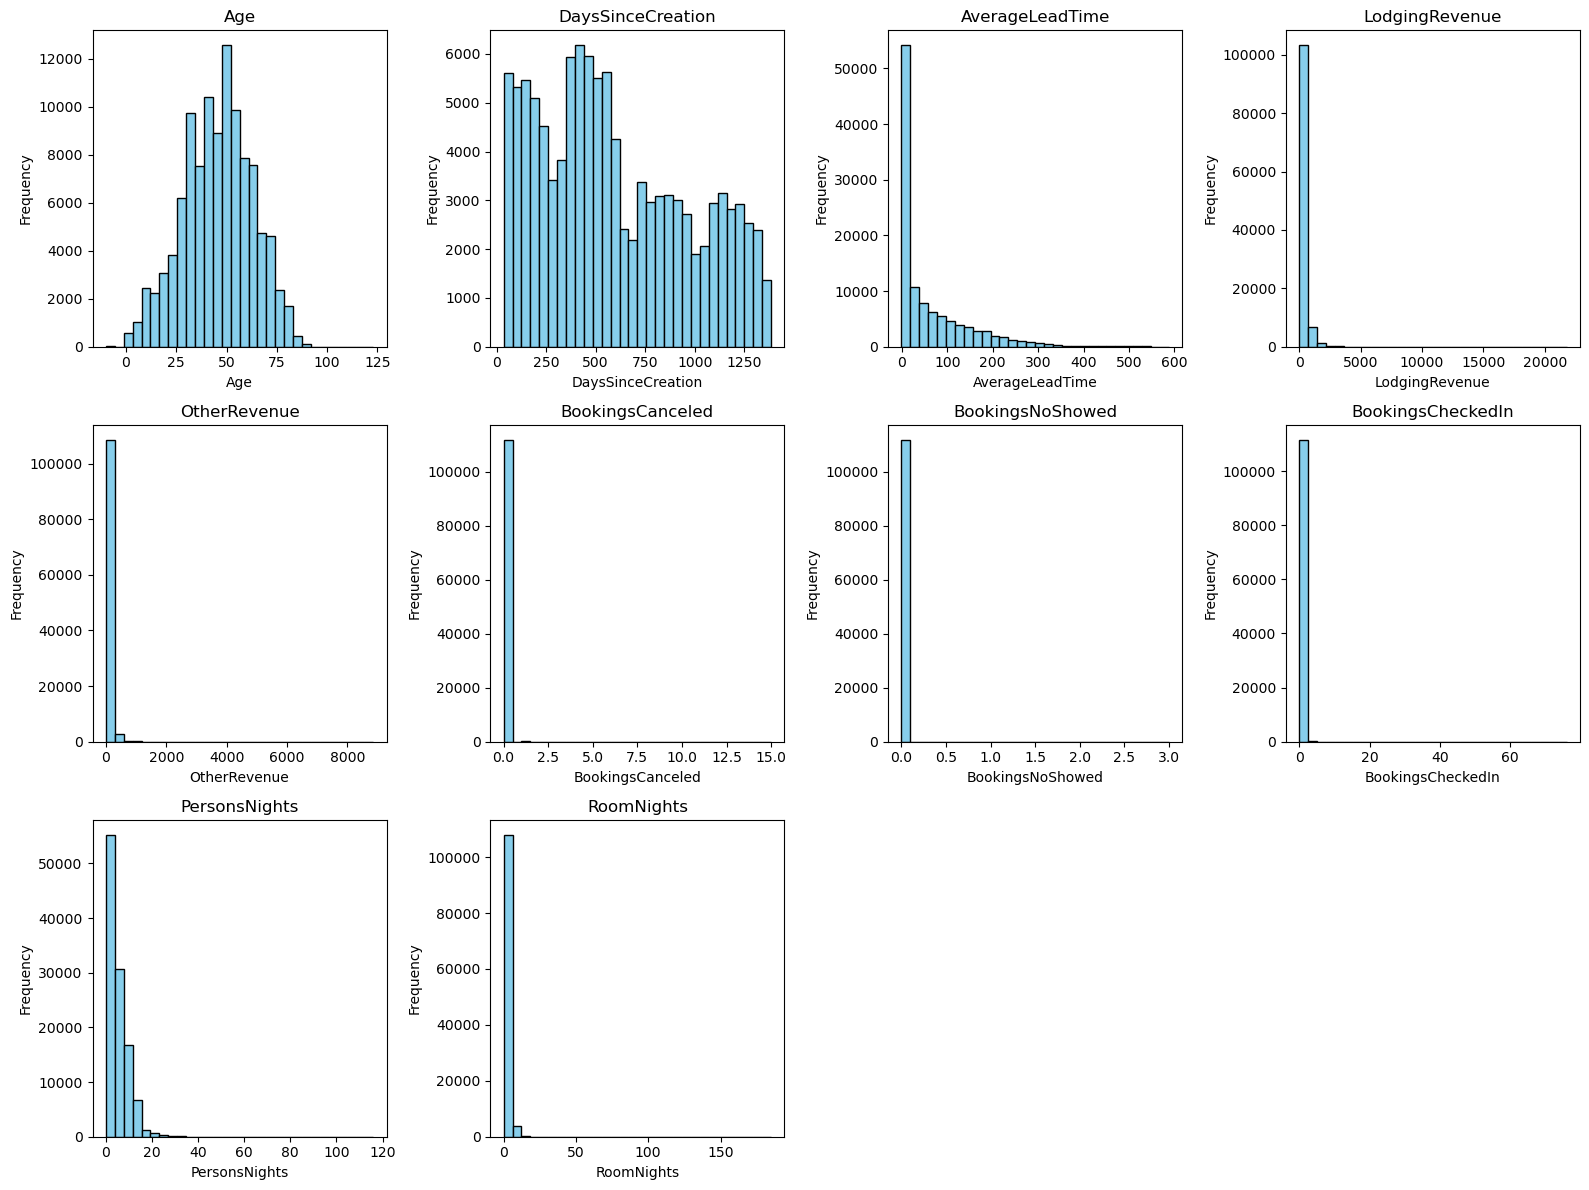

In [109]:
# Set up the grid layout
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16,12))  
axes = axes.flatten()  # Flatten to make indexing easier

# Loop through numerical columns and create histograms
for i, col in enumerate(data_num):
    axes[i].hist(data[col], bins=30, color='skyblue', edgecolor='black')
    axes[i].set_title(col)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frequency")

# Remove empty subplots (if any)
for i in range(len(data_num.columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


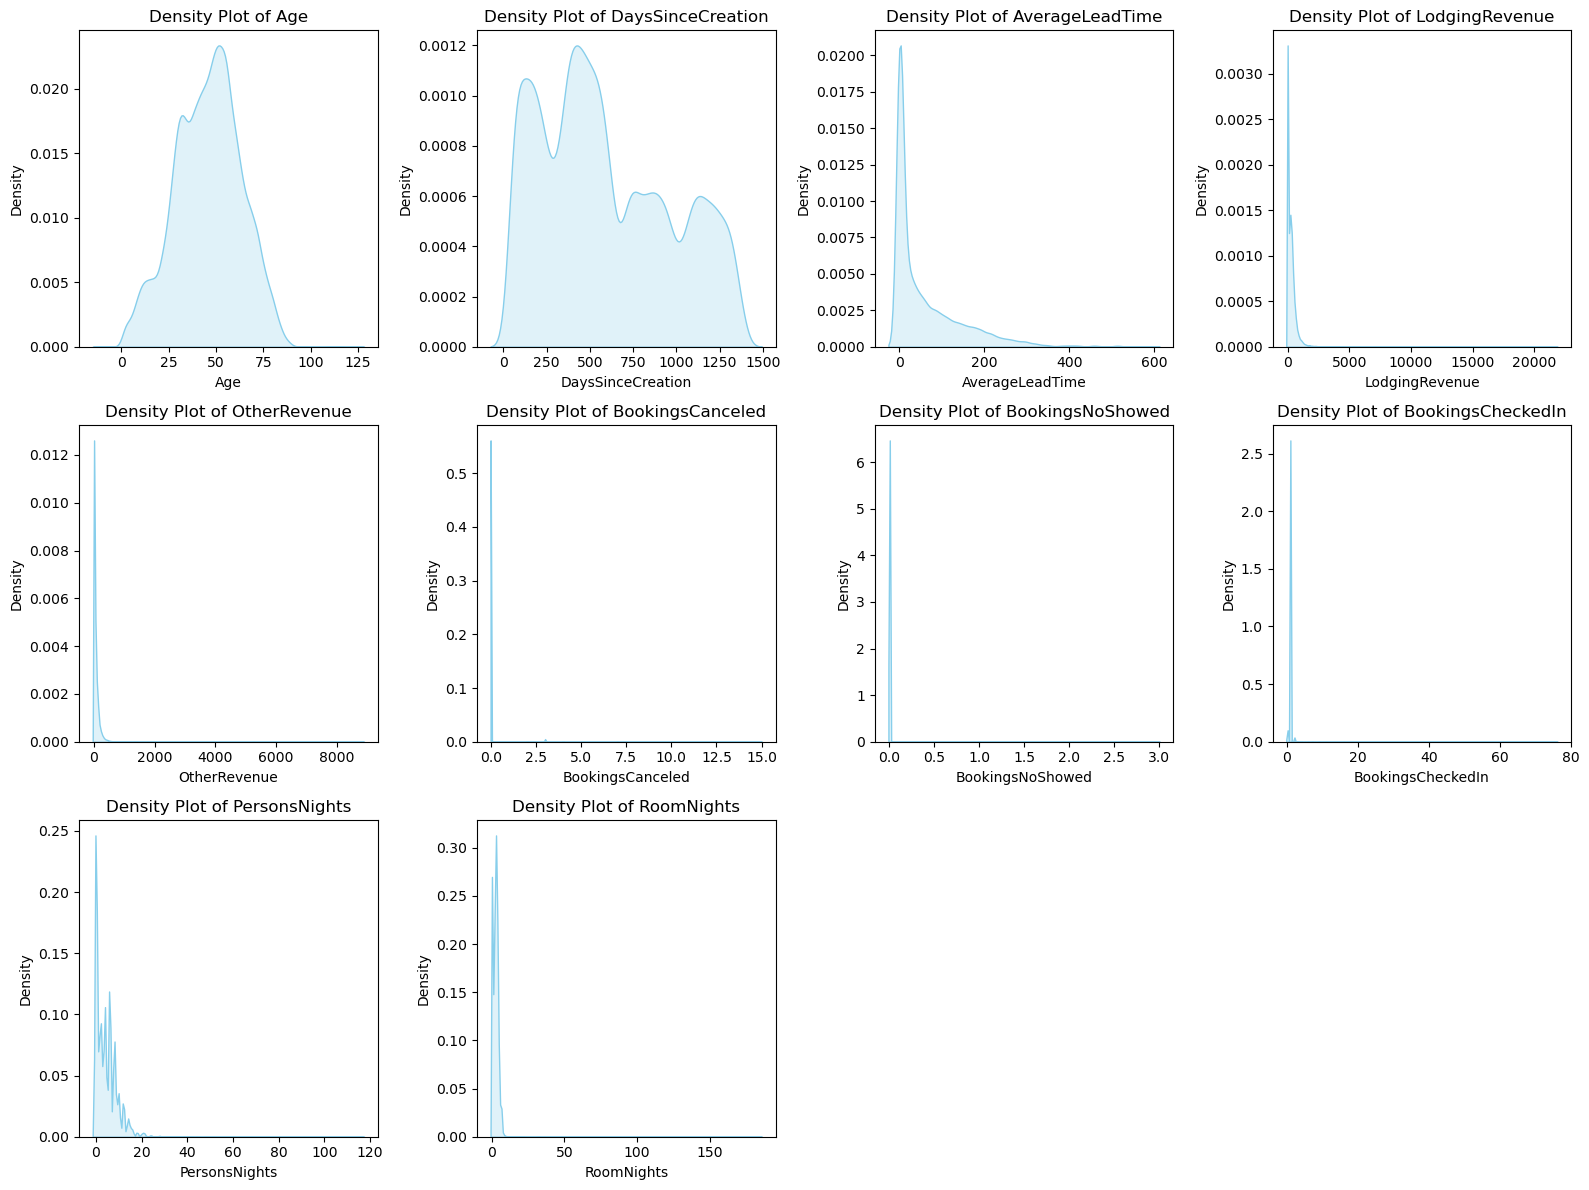

In [110]:
# Set up the grid layout (adjust rows/cols based on the number of features)
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16,12))  
axes = axes.flatten()  # Flatten to make it easier to iterate

# Loop through numerical columns and plot KDE (density) for each
for i, col in enumerate(data_num):
    sns.kdeplot(data[col], fill=True, ax=axes[i], color='skyblue')
    axes[i].set_title(f'Density Plot of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Density')

# Remove empty subplots (if any)
for i in range(len(data_num.columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


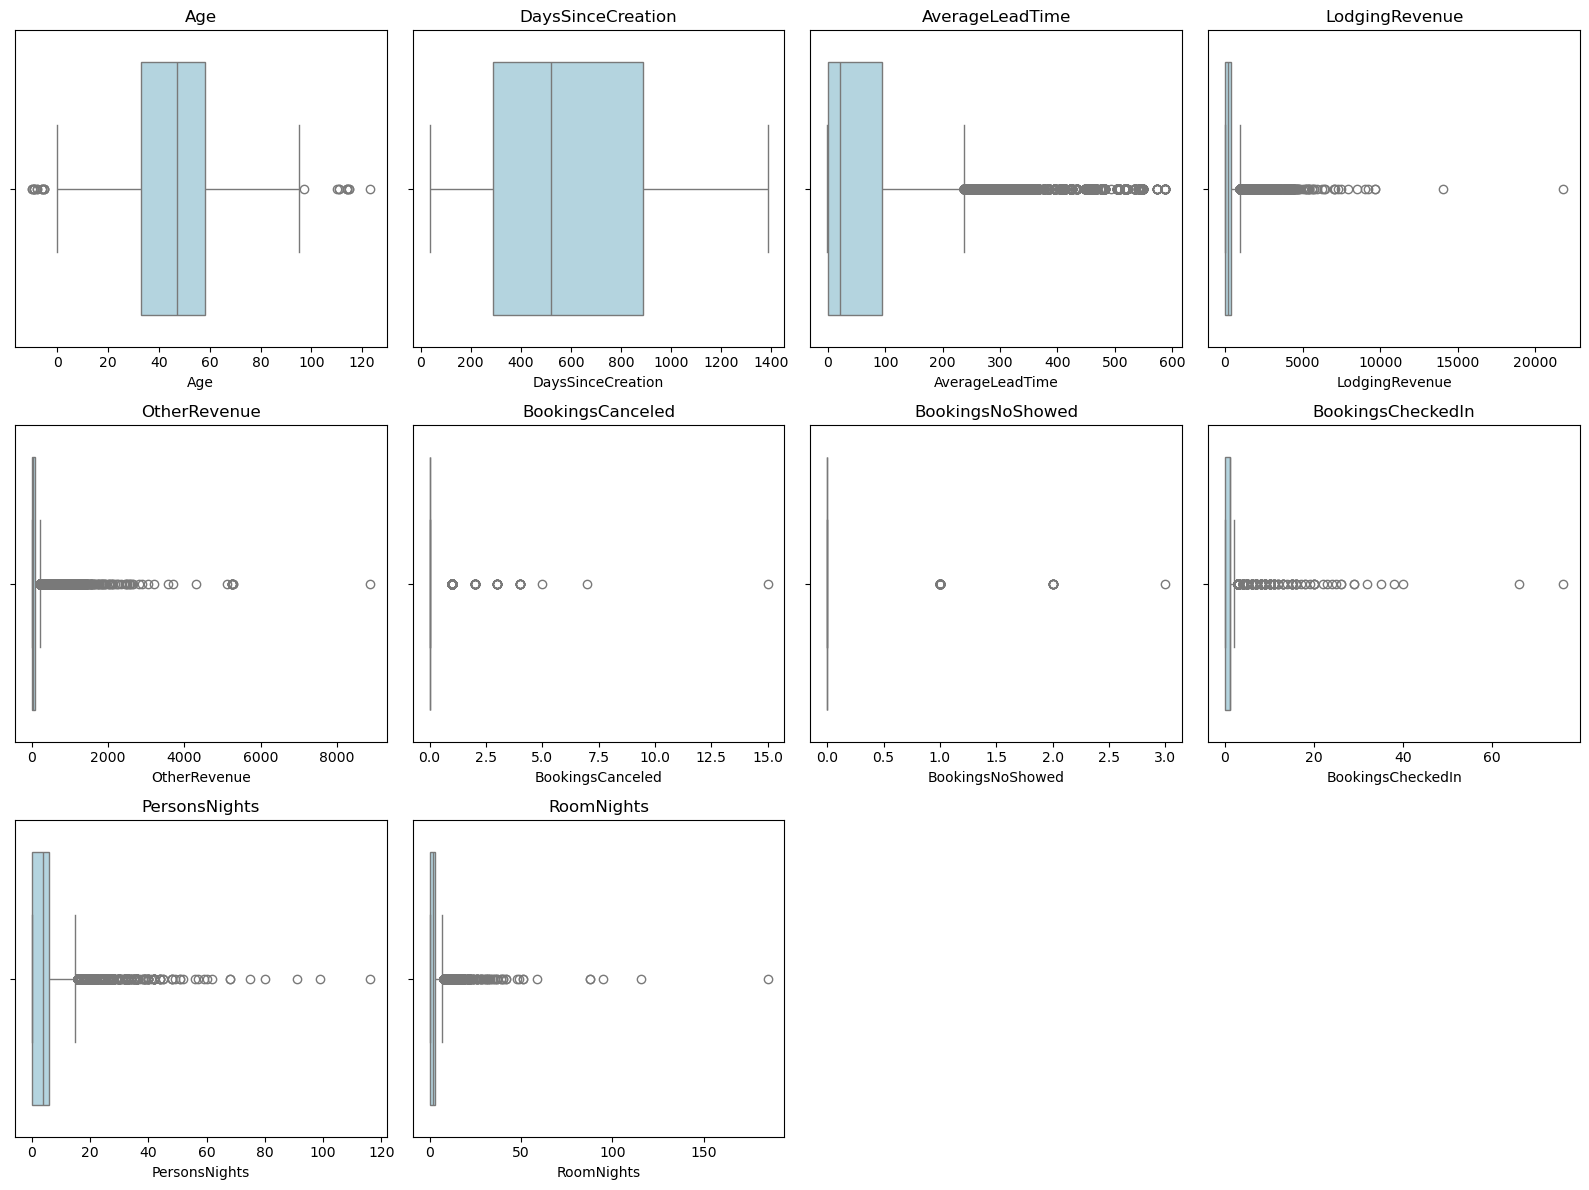

In [111]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16,12))  
axes = axes.flatten()  

for i, col in enumerate(data_num):
    sns.boxplot(x=data[col], ax=axes[i], color='lightblue')
    axes[i].set_title(col)

# Remove empty subplots (if any)
for i in range(len(data_num.columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


In [112]:

# Filter out rows where any numerical column has a value less than 0
# data_cleaned = data[(data[data_num.columns] >= 0).all(axis=1)]

# Check the shape of the cleaned data to see how many rows are removed
# print(f"Original data shape: {data.shape}")
# print(f"Cleaned data shape: {data_cleaned.shape}")


<a class="anchor" id="sub-section-1_4_1_2">

#### 1.4.1.2. Age
    
</a>

In [113]:
data["Age"].describe()

count    107561.000000
mean         45.639191
std          17.244952
min         -10.000000
25%          33.000000
50%          47.000000
75%          58.000000
max         123.000000
Name: Age, dtype: float64

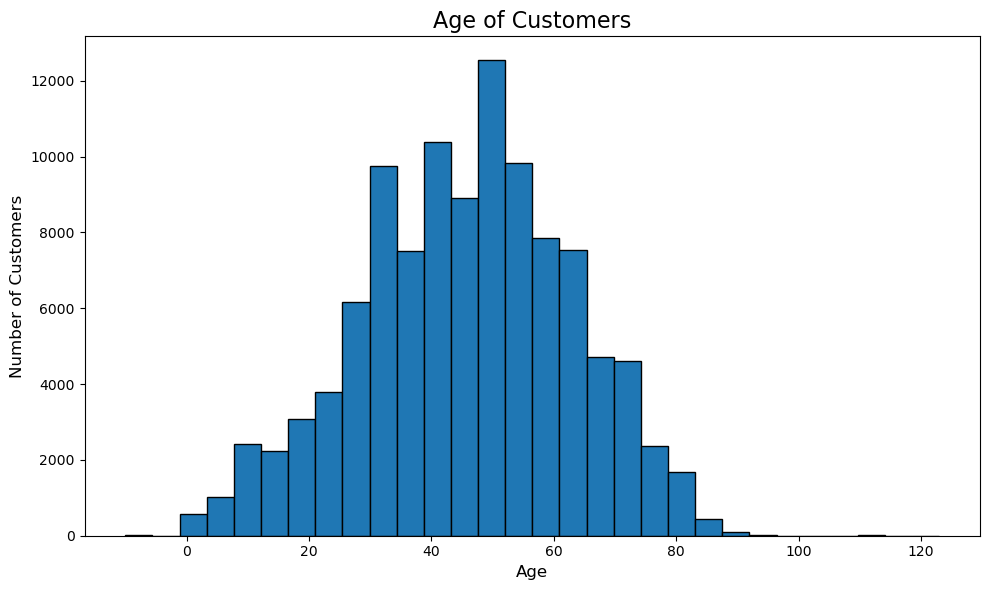

In [114]:
# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(data["Age"], bins=30, edgecolor="black")

plt.title("Age of Customers", fontsize=16)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Number of Customers", fontsize=12)

plt.tight_layout()  
plt.show()

In [115]:
print("Customers with value below 0 (errors): ", len(data[data['Age']<0]))
data[data['Age']<0]

Customers with value below 0 (errors):  14


,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DistributionChannel,MarketSegment,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2053,BIH,-6.0,1324,0xB715504C2E85AA4DDCA6A8B149CB79F73F401C5344A0...,0x9ED63F460C900B662B890A825398EA74E2AB649383BB...,0,0.00,0.00,0,0,0,0,0,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0
2469,ATF,-6.0,1319,0x37BDAE928BB1B43CF2DF052D72361EDEB60912B1CEB5...,0x335624ED7784B64693ACA7AE496D17AB8B4D1FECB0FA...,0,0.00,0.00,0,0,0,0,0,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0
5128,FRA,-8.0,1271,0x98C0A7B15C1EFE465B2F49992DDB2AEEBD6E36544A8D...,0x8E0392C5D36615A020644CC4B910B7F95C4CA6E919E0...,66,93.30,14.00,0,0,1,2,1,Travel Agent/Operator,Other,0,0,0,0,0,0,0,1,0,0,0,0,0
6752,GBR,-10.0,1243,0x8CCCC4A546151AF5A0B1AFF3217ED72A8AC7E3057BD2...,0xE4BA150277C08ADEE04304BE69BBB15790BD8A3F31D8...,22,450.00,18.00,0,0,1,1,1,Travel Agent/Operator,Other,0,0,0,0,0,0,0,1,0,0,0,0,0
8361,DEU,-6.0,1217,0x4E8F0C5ECDEB3D0AD6E10C95F3910287EE9DD117142C...,0xF33AEF1FC174F89346F4BE36A0B0850B264802C28A00...,256,126.00,109.00,0,0,1,4,2,Travel Agent/Operator,Groups,0,0,0,0,0,0,0,0,1,0,0,0,0
8629,NLD,-9.0,1213,0x8BDF931F9F0B596E6227153308A564EEC6D84E74EA5B...,0x8A51E2916F605B51E90ADC7538FD1A0B5770DAB53A78...,111,414.60,34.00,0,0,1,4,4,Travel Agent/Operator,Other,0,0,0,0,0,0,0,1,0,0,0,0,0
9920,DZA,-5.0,1193,0x4DD3955FC0A0B80633A72A1F6F2A855615F39DEC5BC1...,0xD3EBA3BD3BFCB1E5F8E31DCA5E31DC4E0F50C5029C22...,54,138.93,29.50,0,0,1,4,1,Travel Agent/Operator,Other,0,0,0,0,0,0,0,1,0,0,0,0,0
10663,DEU,-9.0,1181,0x92501E90A1E834DCAB204F4CC11FE3DAE5AC269FE298...,0x5259A45D8A6404579086892C6E99A8436D4C87EF838C...,292,126.00,113.00,0,0,1,4,2,Travel Agent/Operator,Groups,0,0,0,0,0,0,0,0,0,0,0,0,0
10695,DEU,-9.0,1181,0x8951768FA5231187E60D24B3540271A2693FDDA0D8EC...,0x1020D6B8DF33486CC701BEB0173833E5FA028482395F...,292,128.00,57.50,0,0,1,2,2,Travel Agent/Operator,Groups,0,0,0,0,0,0,0,0,0,0,0,0,0


In [116]:
print("Customers above the age of 95: ", len(data[data['Age']>95]))
data[data['Age']>95]

Customers above the age of 95:  10


,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DistributionChannel,MarketSegment,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3282,PRT,115.0,1305,0x02D4575C7FE55631DBE81E8181066109AEFDCA58973F...,0xEC8ADED0F788BA1D46CEFF00FE180192B783BDA6F184...,22,79.0,25.5,0,0,1,2,1,Travel Agent/Operator,Other,0,0,0,0,0,0,0,1,0,0,0,0,0
18912,BEL,111.0,1058,0xE000EB79EF885B1FF6DFD46A6AD03211B70002271DD8...,0xB035518A17323A61553F309E937DC06F2CCC53E8E900...,215,140.0,164.8,0,0,1,2,2,Corporate,Groups,0,0,0,0,0,0,0,0,0,0,0,0,0
25590,DEU,114.0,924,0x36BF5A087E8029783FC52501A957412690AA36E271CE...,0x1BF60C4718497A0AB8B46FF00708D3250A484DDA0FDC...,7,492.0,76.4,0,0,1,4,4,Direct,Direct,0,0,0,0,0,0,0,0,0,0,0,0,0
44525,DEU,114.0,627,0xAA6D4B36828028BE3F09FE5751DE971B7BE4B2BC038E...,0xD37FD9597B00ED4BC4EA2CB864521C48882E30DCA7AE...,7,234.0,34.5,0,0,1,4,2,Travel Agent/Operator,Other,0,0,0,0,0,0,0,1,0,0,0,0,0
45089,PRT,115.0,620,0xD906278493442999E6245450B8C306ABB9CA75F39032...,0xB207B868D8878FBBB1D449631EFDB684FAFC49AC57AF...,2,266.0,43.0,0,0,1,2,2,Travel Agent/Operator,Other,1,0,0,0,0,0,0,1,0,0,0,0,0
53298,ITA,123.0,543,0xE651AC190A6B9F1AEC6357AE26B7E871A54A7B5B3398...,0x21711474FF0CA1361823EDB5535B72CF6159EE1AEB43...,0,0.0,0.0,0,0,0,0,0,Travel Agent/Operator,Other,0,0,0,0,0,0,0,0,0,0,0,0,0
58052,AUT,114.0,503,0xA5F68A67139168CF952B006354B65964A2C38D79A4F5...,0xEDE630FB631373804FBF8325A0B48E67E8A8C575E7EF...,0,0.0,0.0,0,0,0,0,0,Travel Agent/Operator,Other,0,0,0,0,0,0,0,0,0,0,0,0,1
62694,NOR,97.0,467,0x1F09EB5D0201D9931BAD9BF82CA729A50644860D542F...,0x18EE62D4260E78AD984A206D021264B767BD3DA86FD8...,87,734.0,24.0,0,0,1,12,6,Travel Agent/Operator,Other,0,0,0,0,0,0,0,0,1,0,0,0,0
64256,ESP,110.0,456,0x021B0CF360983B4B2F3E2F8E5932396CB2B1749EDDED...,0xABE5DDEDEC1FB4E00F82118EDEE61F525D5303E8E421...,0,0.0,0.0,0,0,0,0,0,Travel Agent/Operator,Other,0,0,0,0,0,0,0,0,1,0,0,0,1


In [117]:
print("Underaged customers: ", len(data[data['Age']<18]))
data[data['Age']<18]

Underaged customers:  6893


,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DistributionChannel,MarketSegment,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
35,PRT,4.0,1385,0xD01C4194E347210450E554E5862B791E1DF97238D0DA...,0xB8795BBF0ECC91EBA93C4D34FDC7EE1D04602ECE7172...,0,0.0,0.0,0,0,0,0,0,Direct,Direct,0,0,0,0,0,0,1,0,0,0,0,0,0
68,FRA,14.0,1385,0xDC70BB4054DF5B81FDBD240A60EF5C7BD20A259ACC48...,0x512B4D409945C7825E69A7EE3829983DEB275509BFCC...,0,0.0,0.0,0,0,0,0,0,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0
82,ESP,4.0,1384,0x56A42753E724C20D97AFC90256FBB406DBEAADD0DBD8...,0xDC0D71D5D2B392DDC83D0065D409681BE9C745ECE97B...,103,653.4,759.6,0,0,1,8,4,Direct,Direct,0,0,0,0,0,0,1,1,0,0,0,0,0
88,ESP,7.0,1384,0xF12F01F9738A807C082A3C58E0B6BCB986D515999726...,0x8840ED8674C90FD4FADDB7C5B687FAC0334EBAFD4E0E...,0,0.0,0.0,0,0,0,0,0,Direct,Direct,0,0,0,0,0,0,0,1,0,0,0,0,0
111,FRA,14.0,1384,0xA21EFEEA4828AAA5BB12CAF98CE7722490EFB5BDBD40...,0xE63E20EE75B723540DC27300EA29FF42D0E46B18A2C3...,0,0.0,0.0,0,0,0,0,0,Direct,Direct,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111488,DEU,15.0,39,0x81E1BB5FFB63EA5B5F475FAF29D2D0631FF6B0F765AF...,0x0EA071333B81683A25596E7445E2B9C04A3A430A7109...,31,2436.0,247.5,0,0,1,4,4,Travel Agent/Operator,Other,0,0,0,0,0,0,0,1,0,0,1,0,0
111495,ESP,8.0,39,0x26113DE7770BFACD12DD3AB50C5761386EC4CAB5C58D...,0x6077B7E310A86FA92B563BB989C3E14333C3FBC0146A...,0,0.0,0.0,0,0,0,0,0,Travel Agent/Operator,Other,0,0,0,0,0,0,0,1,0,0,0,0,0
111541,PRT,7.0,39,0xA8F3B9169C48701325ED69D34B5527B9335FD2E072EB...,0xDDB597CFA41D4D4B7F44B4EC2FD04CDE59163DC484A6...,0,0.0,0.0,0,0,0,0,0,Travel Agent/Operator,Other,0,0,0,0,0,0,0,0,0,0,0,0,0


* 4172 missing values (impute with median based on histogram?)
* Extreme values (minus 0 and above 100) - needs to be dealt with
* Can minors be customers?
* Average is 45/ 46

<a class="anchor" id="sub-section-1_4_1_3">

#### 1.4.1.3. Days Since Creation
    
</a>

In [118]:
data["DaysSinceCreation"].describe()

count    111733.000000
mean        595.026599
std         374.657382
min          36.000000
25%         288.000000
50%         522.000000
75%         889.000000
max        1385.000000
Name: DaysSinceCreation, dtype: float64

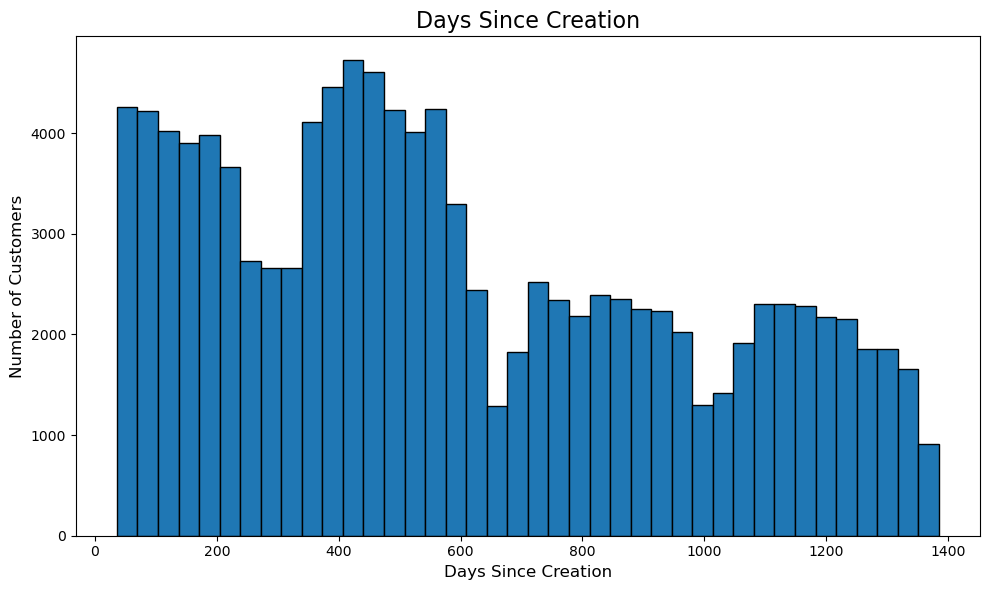

In [119]:
# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(data["DaysSinceCreation"], bins=40, edgecolor="black")

plt.title("Days Since Creation", fontsize=16)
plt.xlabel("Days Since Creation", fontsize=12)
plt.ylabel("Number of Customers", fontsize=12)

plt.tight_layout()  
plt.show()

* Can distinguish peaks - high peak recently

Groups 
* group < 365 (less than a year)
* 365 < group < 730 (1-2 years)
* 730 < group < 1095 (2-3 years)
* 1095 < group (more than 3 years)

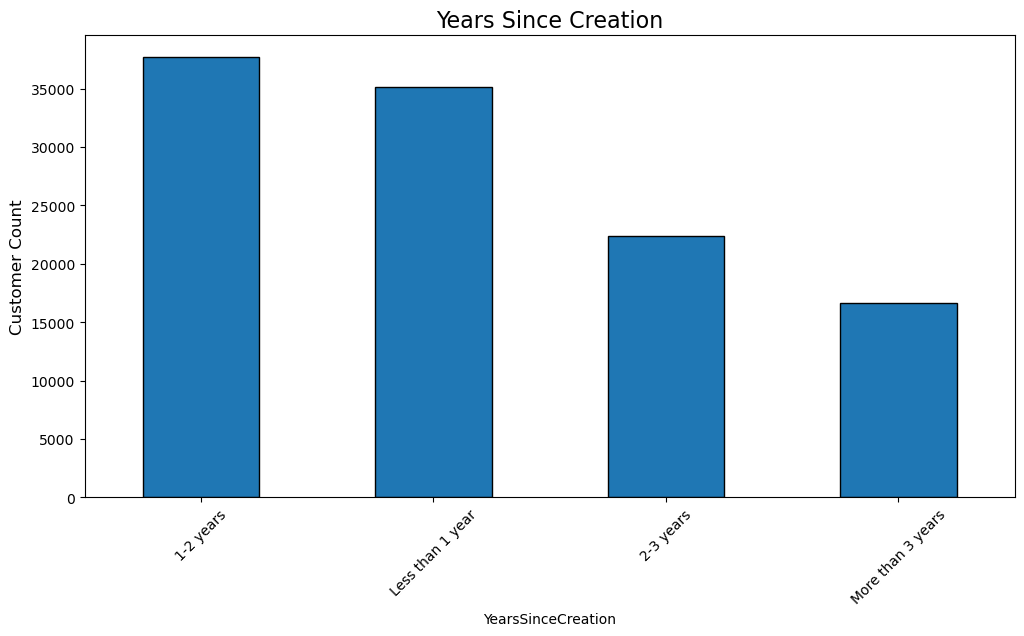

In [120]:
# Create a copy for further exploration without affecting the original data
datacopy = data.copy()

# Define age ranges and their respective labels
creation_date_bins = [0, 365, 730, 1095, float('inf')]
creation_date_labels = ["Less than 1 year", "1-2 years", "2-3 years", "More than 3 years"]

# .cut() segments into the bins and assigns to corresponding labels
datacopy["YearsSinceCreation"] = pd.cut(datacopy["DaysSinceCreation"], bins=creation_date_bins, labels=creation_date_labels)

# Plot a bar chart 
plt.figure(figsize=(12, 6))

years_since_creation = datacopy["YearsSinceCreation"].value_counts()

years_since_creation.plot(kind="bar", edgecolor="black")

plt.title("Years Since Creation", fontsize=16)
plt.ylabel("Customer Count", fontsize=12)
plt.xticks(rotation=45)
plt.show()

* Most customers are recent ones, i.e. within their first 2 years since joining
* But there is a large spread (std = 374)
* Compare with number of bookings

<a class="anchor" id="sub-section-1_4_1_4">

#### 1.4.1.4. Average Lead Time
    
</a>

In [121]:
data["AverageLeadTime"].describe()

count    111733.000000
mean         60.833147
std          85.115320
min          -1.000000
25%           0.000000
50%          21.000000
75%          95.000000
max         588.000000
Name: AverageLeadTime, dtype: float64

In [122]:
# Check customers with average lead time less than 0
print(len(data[data['AverageLeadTime']<0]))
data[data['AverageLeadTime']<0]

13


,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DistributionChannel,MarketSegment,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
23064,PRT,NaN,964,0x498F10CD065519D5A08A680309214C7911457CF2A5CC...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,-1,352.00,30.0,0,0,1,2,1,Travel Agent/Operator,Other,0,0,0,0,0,0,0,0,0,0,0,0,0
29374,USA,25.0,870,0xEEE451C018A695CC592A21016B9713CCE1CAD0CEF039...,0x855CC6ADF35259086B24B2639DD34563A20FD464BF0B...,-1,77.49,3.0,0,0,1,3,1,Travel Agent/Operator,Other,0,0,0,0,0,0,0,0,0,0,0,0,0
51375,CHN,33.0,558,0x61B41490861314B7148F76EE7D7E17A240A86B45259D...,0x4CDEF046A3A97AAC6BD603F2250C8ACCB068C39995C4...,-1,129.00,2.0,0,0,1,2,1,Travel Agent/Operator,Other,0,0,0,0,0,0,0,0,0,0,0,0,0
58655,FRA,57.0,499,0x7E60C14F1CDF540841373495CA352FA8579EA1166911...,0xD3D49D29C16B32E2DF23CB16128500175E12671B6DD3...,-1,149.00,2.0,0,0,1,2,1,Travel Agent/Operator,Other,0,0,0,0,0,0,0,0,0,0,0,0,0
58662,FRA,62.0,499,0x8F817FC15C5606A27141C5FF717456FA9D3D7CE71A48...,0xE71E1E35741B667B50E3BDAD6AE5AE2283DDA0FE50F5...,-1,149.00,2.0,0,0,1,2,1,Travel Agent/Operator,Other,0,0,0,0,0,0,0,0,0,0,0,0,0
58676,FRA,61.0,499,0x7DD53BA3E94C8D8B171B9D50041DC3A23E6F4752A3A8...,0x814B89362FCA5770AEDC4485136D7F673F78793CE218...,-1,149.00,2.0,0,0,1,2,1,Travel Agent/Operator,Other,0,0,0,0,0,0,0,0,0,0,0,0,0
60590,ESP,46.0,485,0xBBBA5623819CD060BB49D9D700348FFEF885F825D019...,0x54D0B32490EA6DAB16F26AFBDAD5037A89E1BDA62B54...,-1,159.00,2.0,0,0,1,2,1,Travel Agent/Operator,Other,0,0,0,0,0,0,0,0,0,0,0,0,0
62690,USA,70.0,468,0x4567E92118939CF20A432369E32BA8959502682AD473...,0x2A1EA7292AF2D9BB083726E0961A38A54950480886BA...,-1,95.20,2.0,0,0,1,2,1,Travel Agent/Operator,Other,0,0,0,0,0,0,0,0,0,0,0,0,0
68486,GBR,46.0,424,0x2FFEF9FB8750A5B78550558BCAB6E6FE0EEFB92B53F9...,0x8FDCAADFD9772221E36C47D962BF5BEFC049103778EC...,-1,282.00,24.0,0,0,1,4,1,Travel Agent/Operator,Other,0,0,0,0,0,0,0,0,0,0,0,0,0


In [123]:
# Check customers with average lead time over 365 days (1 year)
print(len(data[data['AverageLeadTime']>365]))
data[data['AverageLeadTime']>365]

1056


,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DistributionChannel,MarketSegment,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11334,DEU,71.0,1172,0x0501720879B7C8CDB0E84B28B98EF98CBFD4717DC3B2...,0xF43C205BFB725861AC279844DCB81148D680BA926F04...,409,128.0,95.0,0,0,2,4,4,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0
16503,DEU,71.0,1096,0xA5F2811B036D53204A238501E9F054A3E79396BCA638...,0x4DF9AE3D80155BA2DCAAE251D4F8BA987167B8383845...,377,126.0,108.0,0,0,1,4,2,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,1,0,0,0,0
16504,DEU,80.0,1096,0xD8476085BD8A6D1618491725C63E518E4F76D713A28A...,0xBE8678CCC66126AC8471BDA001328419B0012E10CDE6...,377,126.0,110.5,0,0,1,4,2,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,1,0,0,0,0
16517,DEU,79.0,1096,0x412F7078F252E402CE4ADBC00AFE4F7AF5FD1CCF391D...,0x146B8AC337C3E8A0888E758B382C51847EBBC7138E12...,377,126.0,110.5,0,0,1,4,2,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,1,0,0,0,0
16519,DEU,77.0,1096,0x71F9A4EA70AD600AB3C7C29A0DA230AC5946943D702E...,0x7AE6C73B2CD45D65F2513B87C6D76695E8A9D7BFBDA8...,377,126.0,108.0,0,0,1,4,2,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90580,LTU,30.0,212,0x35C716FD08D7E2B44E8EB3AB563D2561824265F297EA...,0x046C421CACE9804E8FC51C472F8299B646DD49075794...,535,492.0,24.0,0,0,1,3,3,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0
90629,GBR,25.0,212,0x777D9B1E862E4F03C60C78F96FD1A20700DCE2364D06...,0xBA6CEE52D462C97224CE57253AA01FE10D979CFA3409...,534,656.0,40.5,0,0,1,4,4,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0
90685,GBR,32.0,211,0xFD327F4CDDD342075FFF89FE8BBC4CE7302B3A0D21ED...,0xB5026BE1C6E85FF84EFC351F0A2BC00309A2CD380518...,533,984.0,95.6,0,0,1,6,6,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0


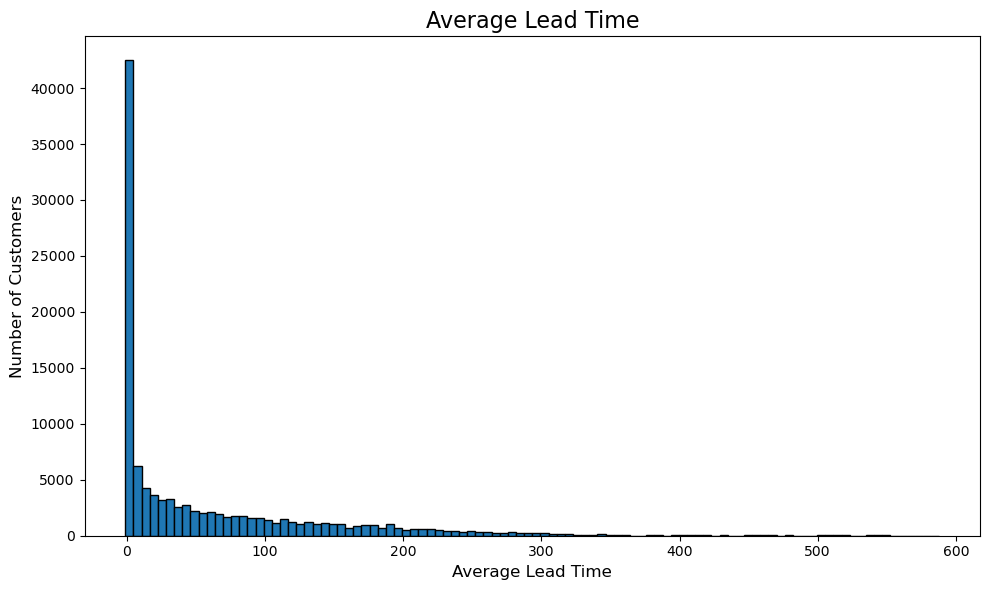

In [124]:
# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(data["AverageLeadTime"], bins=100, edgecolor="black")

plt.title("Average Lead Time", fontsize=16)
plt.xlabel("Average Lead Time", fontsize=12)
plt.ylabel("Number of Customers", fontsize=12)

plt.tight_layout()  
plt.show()

In [125]:
# Count the frequency of lead times
lead_time_counts = datacopy["AverageLeadTime"].value_counts().sort_index()

# Display the most common lead times
print(lead_time_counts.head(22)) 

AverageLeadTime
-1        13
 0     36678
 1      2121
 2      1271
 3      1193
 4      1224
 5      1191
 6      1257
 7      1160
 8      1083
 9       823
 10      706
 11      780
 12      771
 13      788
 14      721
 15      623
 16      591
 17      567
 18      564
 19      630
 20      687
Name: count, dtype: int64


In [126]:
total_entries = len(datacopy["AverageLeadTime"])
top_10_sum = lead_time_counts.head(100).sum()
proportion = top_10_sum / total_entries
print(f"Proportion of top 100 lead times: {proportion:.2%}")

Proportion of top 100 lead times: 75.84%


* 36,678 customers have an average lead time of 0 - errors? 
* Majority of customers 
* Some average lead time below 0 -> error and change to 1?
* Small portion of customers have an average lead time of over 1 year -> planners, customers from far away countries?

<a class="anchor" id="sub-section-1_4_1_5">

#### 1.4.1.5. Lodging Revenue and Other Revenue
    
</a>

In [127]:
data[["LodgingRevenue", "OtherRevenue"]].describe()

,LodgingRevenue,OtherRevenue
count,111733.000000,111733.000000
mean,283.851283,64.682802
std,379.131556,123.580715
min,0.000000,0.000000
25%,0.000000,0.000000
50%,208.000000,31.000000
75%,393.300000,84.000000
max,21781.000000,8859.250000


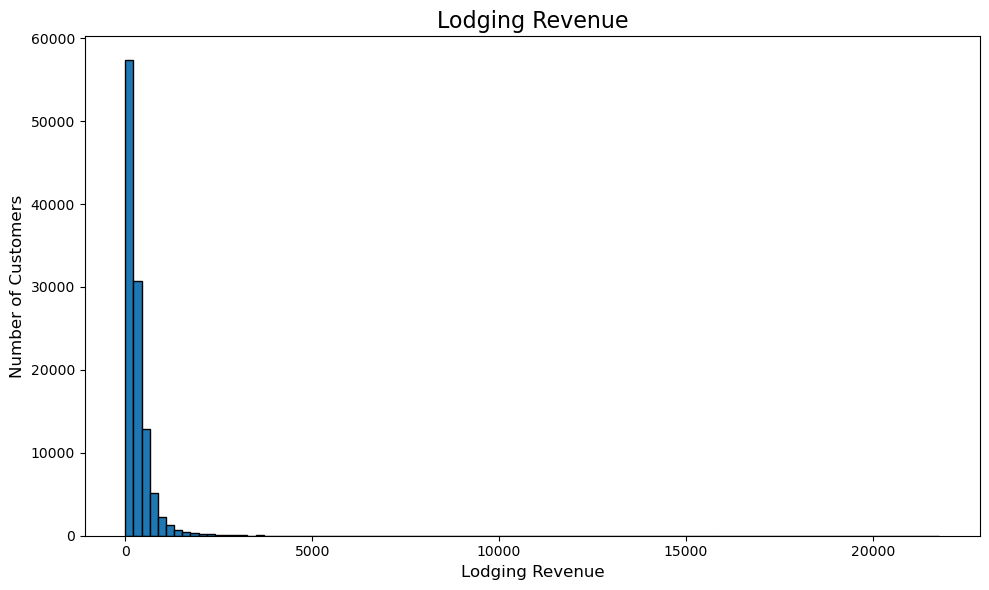

In [128]:
# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(data["LodgingRevenue"], bins=100, edgecolor="black")

plt.title("Lodging Revenue", fontsize=16)
plt.xlabel("Lodging Revenue", fontsize=12)
plt.ylabel("Number of Customers", fontsize=12)

plt.tight_layout()  
plt.show()

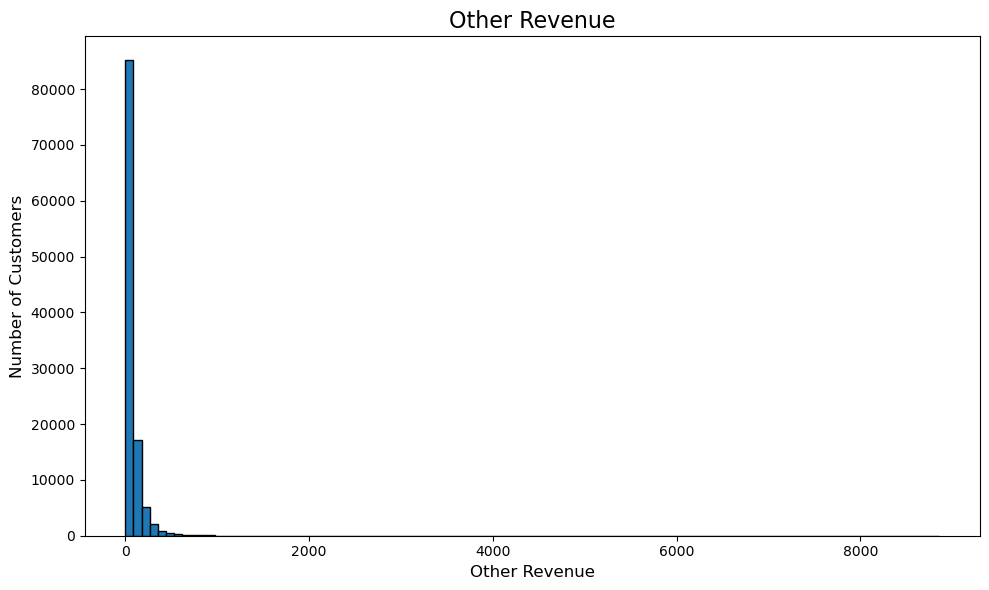

In [129]:
# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(data["OtherRevenue"], bins=100, edgecolor="black")

plt.title("Other Revenue", fontsize=16)
plt.xlabel("Other Revenue", fontsize=12)
plt.ylabel("Number of Customers", fontsize=12)

plt.tight_layout()  
plt.show()

In [130]:
print("Lodging Revenue = 0: ", len(data[data["LodgingRevenue"]==0]))
print("Other Revenue = 0: ", len(data[data["OtherRevenue"]==0]))

Lodging Revenue = 0:  33769
Other Revenue = 0:  33552


In [131]:
print("Customers with Lodging Revenue = 0 but Other Revenue > 0: ", 
      len(data[(data["LodgingRevenue"] == 0) & (data["OtherRevenue"] > 0)]))

print("Customers with Other Revenue = 0 but Lodging Revenue > 0: ", 
      len(data[(data["OtherRevenue"] == 0) & (data["LodgingRevenue"] > 0)]))

print("Customers with Other Revenue = 0 and Lodging Revenue = 0: ", 
      len(data[(data["OtherRevenue"] == 0) & (data["LodgingRevenue"] == 0)]))

Customers with Lodging Revenue = 0 but Other Revenue > 0:  232
Customers with Other Revenue = 0 but Lodging Revenue > 0:  15
Customers with Other Revenue = 0 and Lodging Revenue = 0:  33537


* 33,537 customers have spent nothing - just created an account? check with bookings canceled and no showed
* 232 customers with Lodging Revenue = 0 but Other Revenue > 0 -> customers who just go for services?, e.g. restaurant
* Extreme max values - frequent customers? or events (e.g. corporate events)? 

<a class="anchor" id="sub-section-1_4_1_6">

#### 1.4.1.6. Bookings
    
</a>

In [132]:
data[["BookingsCanceled", "BookingsNoShowed", "BookingsCheckedIn"]].describe()

,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn
count,111733.000000,111733.000000,111733.000000
mean,0.002282,0.000600,0.737607
std,0.080631,0.028217,0.730889
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000
75%,0.000000,0.000000,1.000000
max,15.000000,3.000000,76.000000


In [133]:
print("Customers with Bookings Canceled = 0 and Bookings No Showed = 0 and Bookings Checked In = 0: ", 
      len(data[(data["BookingsCanceled"] == 0) & (data["BookingsNoShowed"] == 0) & (data["BookingsCheckedIn"] == 0)]))

Customers with Bookings Canceled = 0 and Bookings No Showed = 0 and Bookings Checked In = 0:  33197


In [134]:
print("Customers that did not check in: ", len(data[data["BookingsCheckedIn"]==0]))
print("Customers that only checked in once: ", len(data[data["BookingsCheckedIn"]==1]))
print("Customers that checked in more than once: ", len(data[data["BookingsCheckedIn"]>1]))

Customers that did not check in:  33198
Customers that only checked in once:  76474
Customers that checked in more than once:  2061


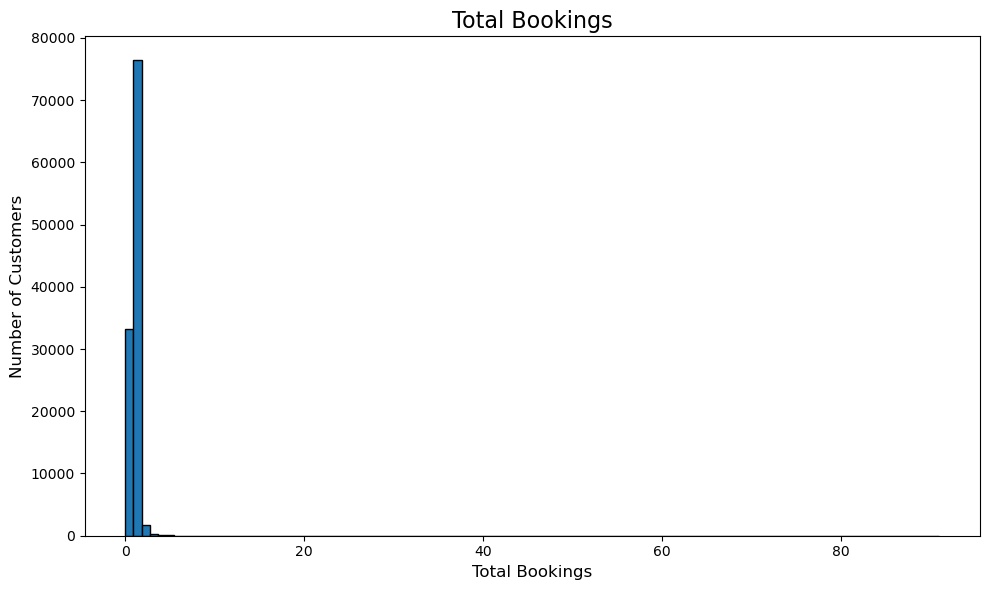

In [135]:
# Check total bookings
datacopy["TotalBookings"] = datacopy["BookingsCanceled"] + datacopy["BookingsNoShowed"] + datacopy["BookingsCheckedIn"]

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(datacopy["TotalBookings"], bins=100, edgecolor="black")

plt.title("Total Bookings", fontsize=16)
plt.xlabel("Total Bookings", fontsize=12)
plt.ylabel("Number of Customers", fontsize=12)

plt.tight_layout()  
plt.show()

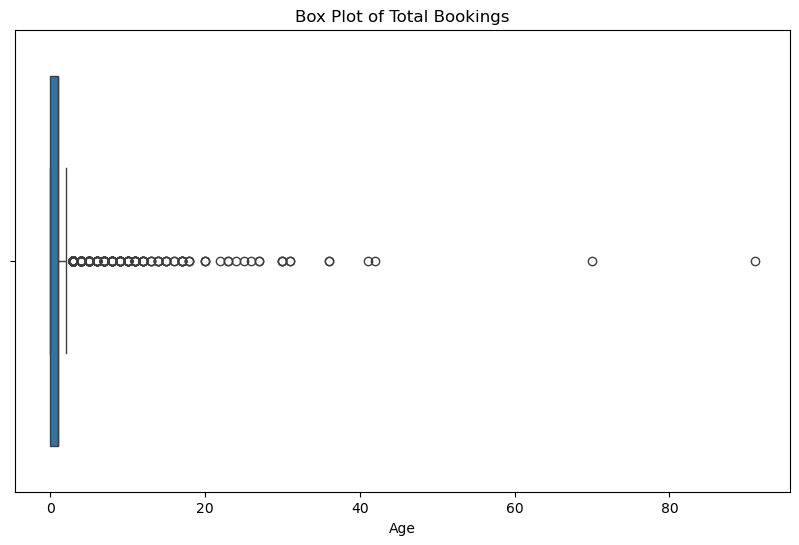

In [136]:
# Box plot
plt.figure(figsize=(10, 6))

sns.boxplot(x=datacopy["TotalBookings"])
plt.title("Box Plot of Total Bookings")
plt.xlabel("Age")
plt.show()

In [137]:
# Check customers with total bookings over 20
print(len(datacopy[datacopy['TotalBookings']>20]))
datacopy[datacopy['TotalBookings']>20]

19


,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DistributionChannel,MarketSegment,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,YearsSinceCreation,TotalBookings
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2160,PRT,48.0,1323,0xFB64B4B6AB53A6A549A620009CA24A1C3A668A460D87...,0x2B17E9D2CCEF2EA0FE752EE345BEDFB06741FFC8ECEC...,20,8493.65,2587.50,3,1,66,75,95,Corporate,Corporate,0,0,0,0,0,0,0,1,0,0,0,0,0,More than 3 years,70
2757,PRT,NaN,1315,0x382BF2A6BF57870D9831631A7ACA7B30CB42FE9FEEDF...,0xF728641F469966A5AA8906B76CC8C3083A0BDEC9F24F...,57,21781.00,1584.00,1,0,29,62,185,Corporate,Direct,0,0,0,0,0,0,0,0,0,0,0,0,0,More than 3 years,30
3776,PRT,41.0,1295,0x444EB58CD6E2EBD7F1FEB432CBDC479E2547A695E7B8...,0x07589FC8EEC3A30BE3EC554D4F3449D2AAE2C4F6F5ED...,6,3910.00,433.50,2,1,38,42,42,Corporate,Corporate,0,0,0,0,0,0,0,0,0,0,0,0,0,More than 3 years,41
5661,PRT,39.0,1262,0xF449E3ECCA6266316672CE4A61C4C929E2074FE1CD5C...,0x9FDE05A1069433D2727C16971981363B6362CFDE36E0...,5,2747.00,375.00,1,0,29,33,33,Corporate,Corporate,0,0,0,0,0,0,0,1,0,0,0,0,0,More than 3 years,30
6676,PRT,24.0,1245,0xD6205FF57E5A48A8C773D71207A145B3C0FA9D4F10F1...,0xE554DC6FFD163F10EB3D6729F9B9FBF91E88B7E0B109...,3,2615.00,820.60,2,2,32,42,33,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,1,0,0,0,0,0,More than 3 years,36
11371,PRT,68.0,1171,0x928A80D71CCB93FFE4F5DDFC09B0A268D5EDFF014497...,0x271ED96450FDE930F5F7F9FF36E8BAA2785689B70F58...,5,2083.00,231.00,1,0,26,35,35,Corporate,Corporate,0,0,0,0,0,0,0,1,0,0,0,0,0,More than 3 years,27
11416,PRT,49.0,1170,0xCC6A9BE603D312DEFDFD886218FB1FE35EC93C47F6C7...,0x3856085146F7BC27BD07BFC4CA1991ED4E65E179D7BD...,11,2364.00,404.00,4,0,26,36,36,Corporate,Corporate,0,0,0,0,0,0,0,1,0,0,0,0,0,More than 3 years,30
11481,PRT,59.0,1169,0x5208B365ECB706685A00A16D131AEAEC63208B3B5BC4...,0x6C6CBE81716B51F09ECE9AD8CBB82E1AB5175CEFBC5B...,3,195.75,87.00,15,0,76,99,88,Direct,Complementary,0,0,0,0,0,0,0,1,0,0,0,0,0,More than 3 years,91
12832,PRT,49.0,1149,0x40F5646DCC49C898AFD744A94CE4FC629A42D402107D...,0x3856085146F7BC27BD07BFC4CA1991ED4E65E179D7BD...,5,2182.00,351.00,0,0,23,39,37,Corporate,Corporate,0,0,0,0,0,0,0,1,0,0,0,0,0,More than 3 years,23


In [138]:
# Count the frequency of total bookings
total_bookings_counts = datacopy["TotalBookings"].value_counts().sort_index()

# Display the most common number of total bookings
print(total_bookings_counts.head(20)) 

TotalBookings
0     33197
1     76416
2      1652
3       227
4        59
5        38
6        16
7        23
8        18
9        14
10       11
11       11
12        7
13        3
14        4
15        4
16        2
17        6
18        3
20        3
Name: count, dtype: int64


* 33197 customers with no booking activity - check if those customers just created an account
* Customers with over 20 bookings are mainly corporate customers
* Most customers who made a bookings have 1 or 2 bookings - check if nationalities have an impact?

<a class="anchor" id="sub-section-1_4_1_7">

#### 1.4.1.7. Persons/ Nights and Room/ Nights
    
</a>

In [139]:
data[["PersonsNights", "RoomNights"]].describe()

,PersonsNights,RoomNights
count,111733.000000,111733.000000
mean,4.328318,2.203825
std,4.630739,2.301637
min,0.000000,0.000000
25%,0.000000,0.000000
50%,4.000000,2.000000
75%,6.000000,3.000000
max,116.000000,185.000000


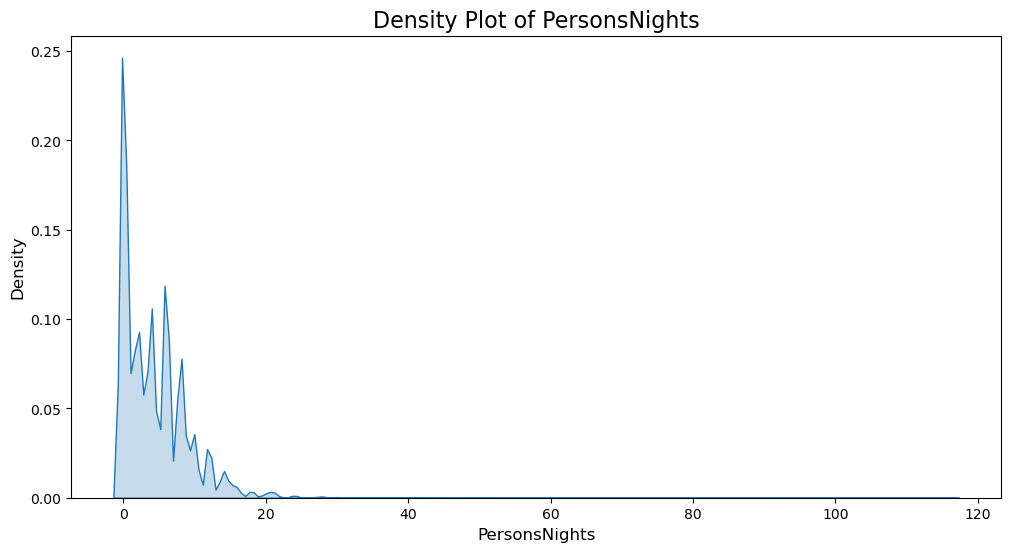

In [179]:
plt.figure(figsize=(12, 6))

sns.kdeplot(data["PersonsNights"], fill=True)

plt.title("Density Plot of PersonsNights", fontsize=16)
plt.xlabel("PersonsNights", fontsize=12)
plt.ylabel("Density", fontsize=12)

plt.show()


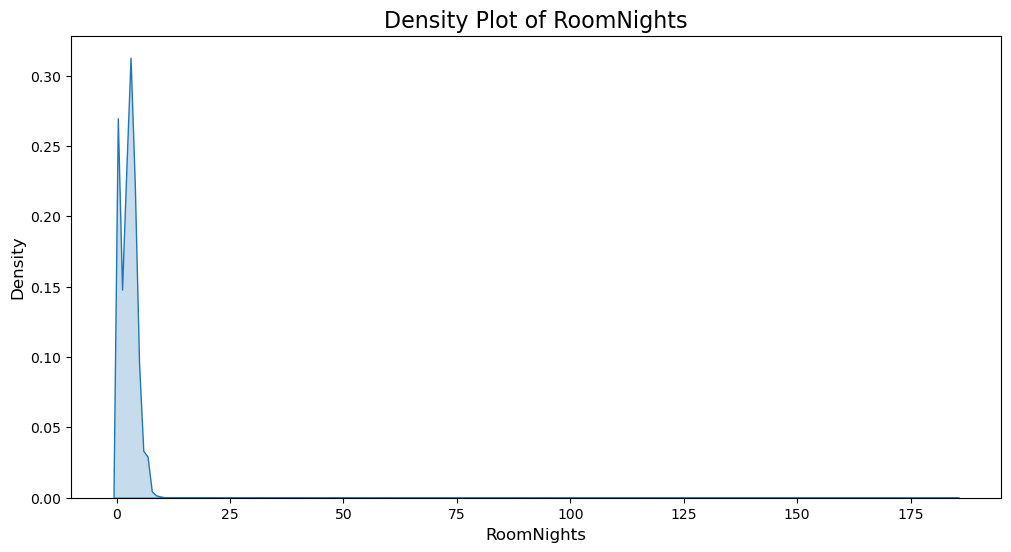

In [180]:
plt.figure(figsize=(12, 6))

sns.kdeplot(data["RoomNights"], fill=True)

plt.title("Density Plot of RoomNights", fontsize=16)
plt.xlabel("RoomNights", fontsize=12)
plt.ylabel("Density", fontsize=12)

plt.show()

* Mean of persons/ nights is 4 - families?
* Average of 2 rooms - short stays

<a class="anchor" id="sub-section-1_4_2">

### 1.4.2. Categorical Variables
    
</a>

<a class="anchor" id="sub-section-1_4_2_1">

#### 1.4.2.1. Nationality
    
</a>

In [145]:
data["Nationality"].value_counts().head(20)

Nationality
FRA    16516
DEU    14805
PRT    14101
GBR    11462
ESP     6123
USA     5409
ITA     4268
BEL     4111
BRA     4037
NLD     3794
IRL     2938
CHE     2686
CAN     2192
AUT     1949
SWE     1687
ISR     1149
CHN     1147
NOR     1055
POL     1035
AUS     1022
Name: count, dtype: int64

In [156]:
# Put the top20 nationalities in a list
top20_nationalities = data["Nationality"].value_counts().head(20).index.tolist()
print(f" the top 20 nationalities are {top20_nationalities}.")

 the top 20 nationalities are ['FRA', 'DEU', 'PRT', 'GBR', 'ESP', 'USA', 'ITA', 'BEL', 'BRA', 'NLD', 'IRL', 'CHE', 'CAN', 'AUT', 'SWE', 'ISR', 'CHN', 'NOR', 'POL', 'AUS'].


In [157]:
# Get the value counts for each nationality
nationality_counts = data["Nationality"].value_counts()

# Get the total count of all nationalities
total_count = nationality_counts.sum()

# Compute the percentage representation of the top 20 nationalities
top20_percentages = round((nationality_counts.loc[top20_nationalities] / total_count) * 100,2)

# Display the results in a DataFrame
top20_df = pd.DataFrame({"Nationality": top20_nationalities, "Percentage": top20_percentages.values})

top20_df

,Nationality,Percentage
0,FRA,14.78
1,DEU,13.25
2,PRT,12.62
3,GBR,10.26
4,ESP,5.48
5,USA,4.84
6,ITA,3.82
7,BEL,3.68
8,BRA,3.61
9,NLD,3.40


In [158]:
# Sum the percentages in the top 10 nationalities
top20_marketshare = top20_df["Percentage"].sum()
print(f"The top 20 nationalities represent {round(top20_marketshare,2)}% of the total market share")

The top 20 nationalities represent 90.82% of the total market share


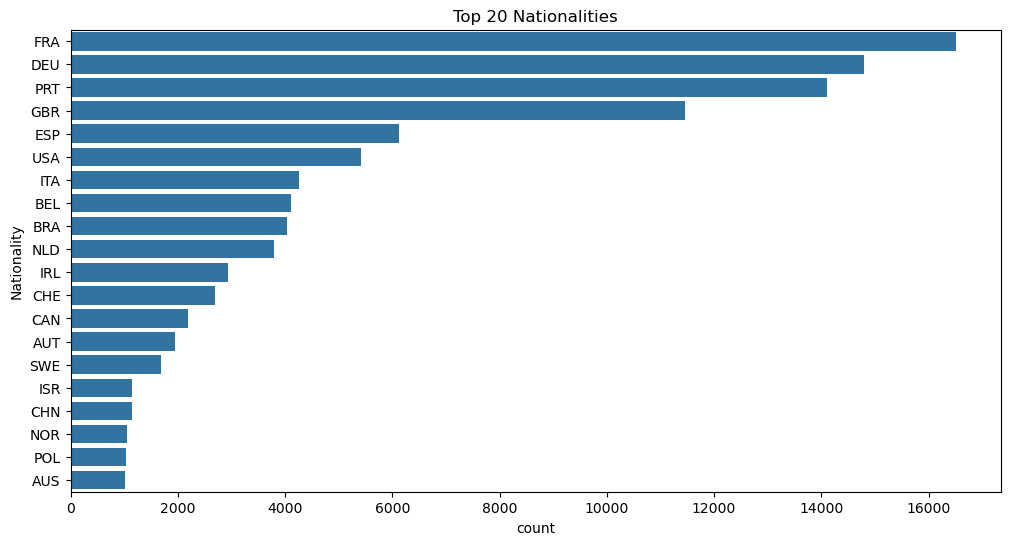

In [159]:
# Plot the top20 nationalities
plt.figure(figsize=(12, 6))
sns.countplot(data=data, y="Nationality", order=top20_nationalities)
plt.title("Top 20 Nationalities")
plt.show()

In [160]:
# check how many nationalities have less than 10 occurrences
nationalities_less_than_10 = nationality_counts[nationality_counts < 10].index
print(f"There are {nationalities_less_than_10.shape[0]} nationalities with less than 10 occurrences")

There are 96 nationalities with less than 10 occurrences


<a class="anchor" id="sub-section-1_4_2_2">

#### 1.4.2.2. Distribution Channel
    
</a>

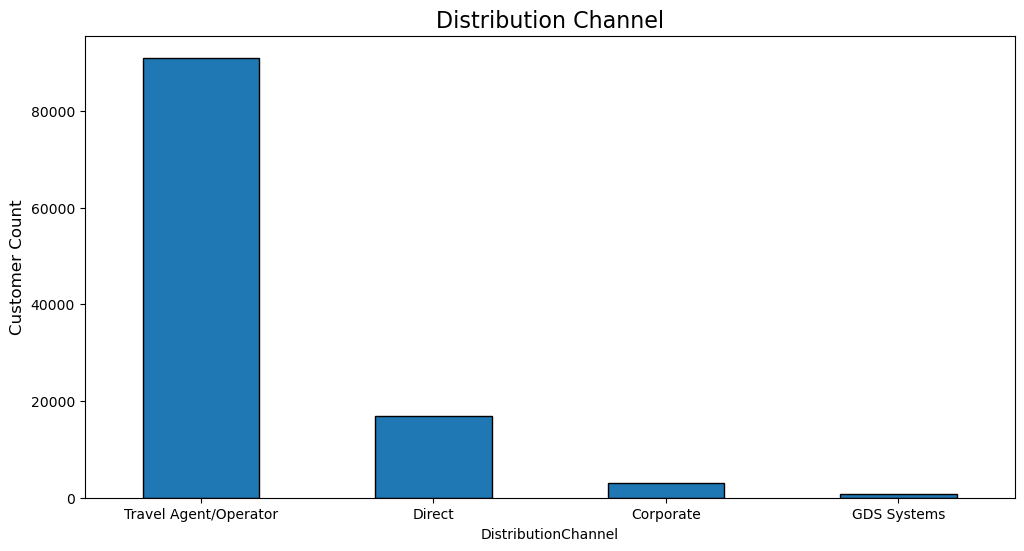

In [161]:
# Plot a bar chart 
plt.figure(figsize=(12, 6))

distribution_channel = data["DistributionChannel"].value_counts()

distribution_channel.plot(kind="bar", edgecolor="black")

plt.title("Distribution Channel", fontsize=16)
plt.ylabel("Customer Count", fontsize=12)
plt.xticks(rotation=0)
plt.show()

In [165]:
distribution_channel

DistributionChannel
Travel Agent/Operator    91019
Direct                   16883
Corporate                 3135
GDS Systems                696
Name: count, dtype: int64

<a class="anchor" id="sub-section-1_4_2_3">

#### 1.4.2.3. Market Segment
    
</a>

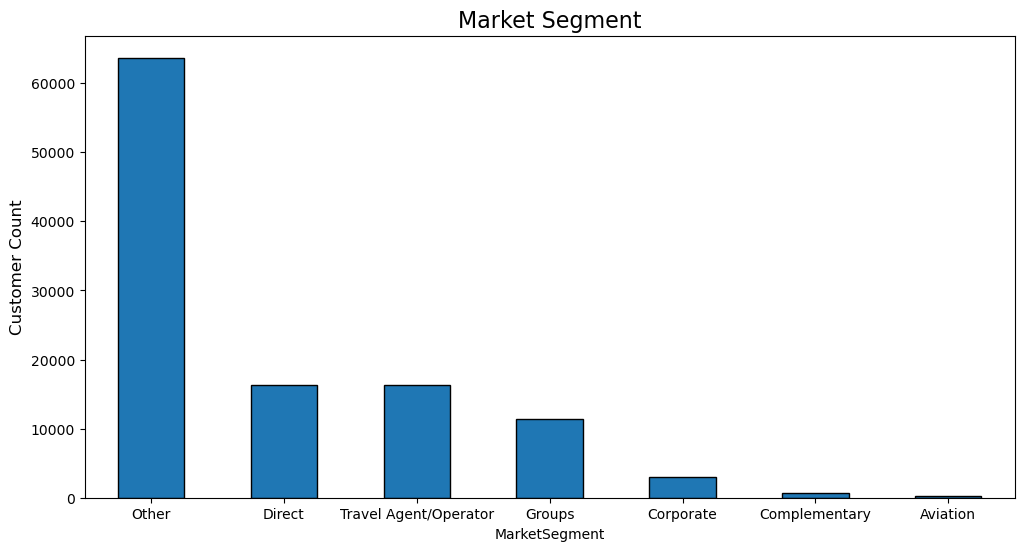

In [162]:
# Plot a bar chart 
plt.figure(figsize=(12, 6))

market_segment = data["MarketSegment"].value_counts()

market_segment.plot(kind="bar", edgecolor="black")

plt.title("Market Segment", fontsize=16)
plt.ylabel("Customer Count", fontsize=12)
plt.xticks(rotation=0)
plt.show()

In [164]:
market_segment

MarketSegment
Other                    63680
Direct                   16363
Travel Agent/Operator    16353
Groups                   11461
Corporate                 2931
Complementary              657
Aviation                   288
Name: count, dtype: int64

<a class="anchor" id="sub-section-1_4_3">

### 1.4.3. Binary Variables
    
</a>

In [167]:
data_bin.columns

Index(['SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom', 'SRMediumFloor',
       'SRBathtub', 'SRShower', 'SRCrib', 'SRKingSizeBed', 'SRTwinBed',
       'SRNearElevator', 'SRAwayFromElevator', 'SRNoAlcoholInMiniBar',
       'SRQuietRoom'],
      dtype='object')

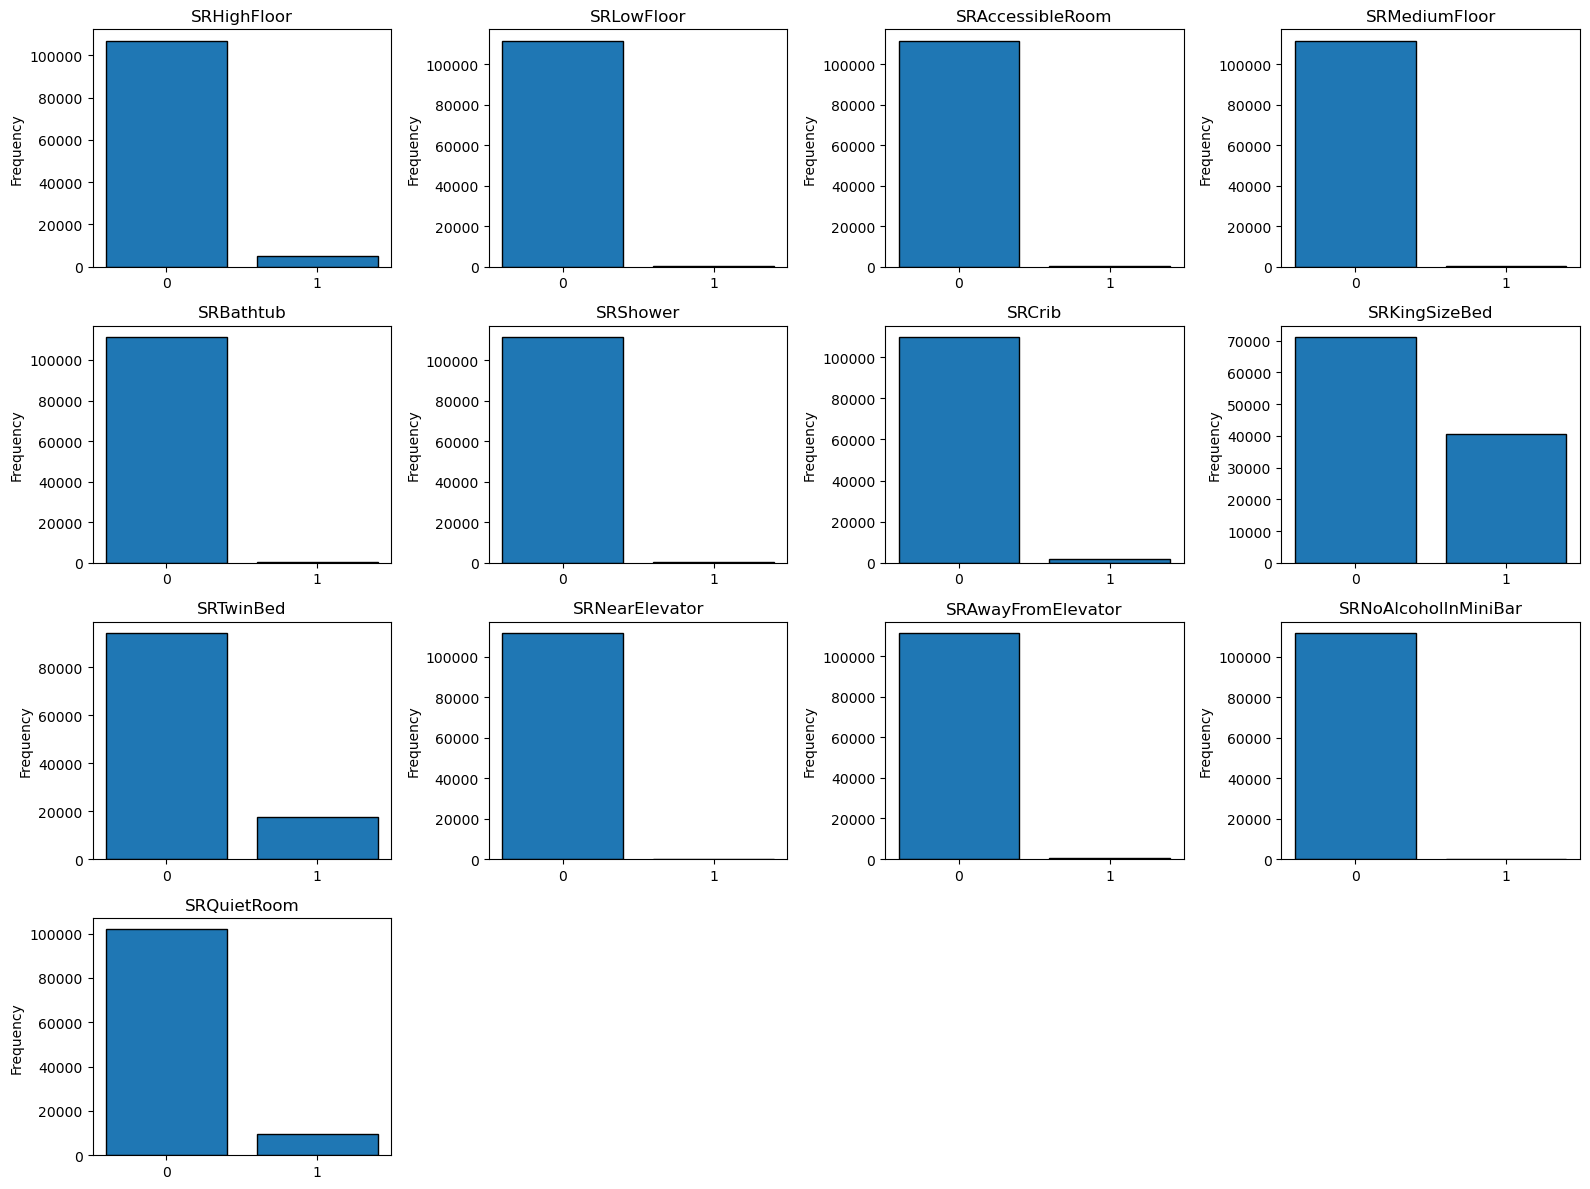

In [171]:
# Set up the grid layout
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(16, 12))  
axes = axes.flatten()  # Flatten to make indexing easier

# Loop through binary columns and create bar plots
for i, col in enumerate(data_bin.columns):
    value_counts = data_bin[col].value_counts() 
    
    # Bar plot for binary variables
    axes[i].bar(value_counts.index, value_counts.values, edgecolor='black')
    
    axes[i].set_title(col)
    axes[i].set_xticks([0, 1])
    axes[i].set_ylabel("Frequency")

# Remove empty subplots (if any)
for i in range(len(data_bin.columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

In [174]:
data["SRNearElevator"].value_counts()

SRNearElevator
0    111696
1        37
Name: count, dtype: int64

In [175]:
data["SRNoAlcoholInMiniBar"].value_counts()

SRNoAlcoholInMiniBar
0    111711
1        22
Name: count, dtype: int64

In [176]:
# Number of Requests

datacopy["NumberOfRequests"] = (datacopy["SRHighFloor"] + datacopy["SRLowFloor"] + datacopy["SRAccessibleRoom"] + 
                                datacopy["SRMediumFloor"] + datacopy["SRBathtub"] + datacopy["SRShower"] + 
                                datacopy["SRCrib"] + datacopy["SRKingSizeBed"] + datacopy["SRTwinBed"] + 
                                datacopy["SRNearElevator"] + datacopy["SRAwayFromElevator"] + 
                                datacopy["SRNoAlcoholInMiniBar"] + datacopy["SRQuietRoom"])

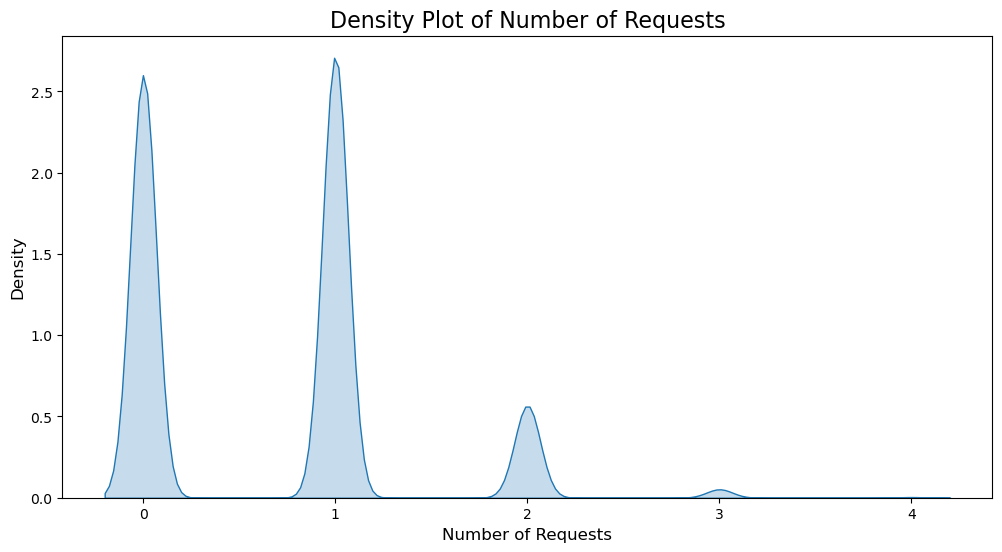

In [182]:
plt.figure(figsize=(12, 6))

sns.kdeplot(datacopy["NumberOfRequests"], fill=True)

plt.title("Density Plot of Number of Requests", fontsize=16)
plt.xlabel("Number of Requests", fontsize=12)
plt.ylabel("Density", fontsize=12)

plt.show()

* Most popular requests is King Size Bed
* Other requests: Twin Bed, Quiet Room
* Check if number request has a correlation with revenue? 
* Check if PersonsNight or Market Segment impacts type of request?

<a class="anchor" id="sub-section-1_5">

## 1.5. Multivariate Analysis
    
</a>

<a class="anchor" id="sub-section-1_5_1">

### 1.5.1. Numerical Relationships
    
</a>

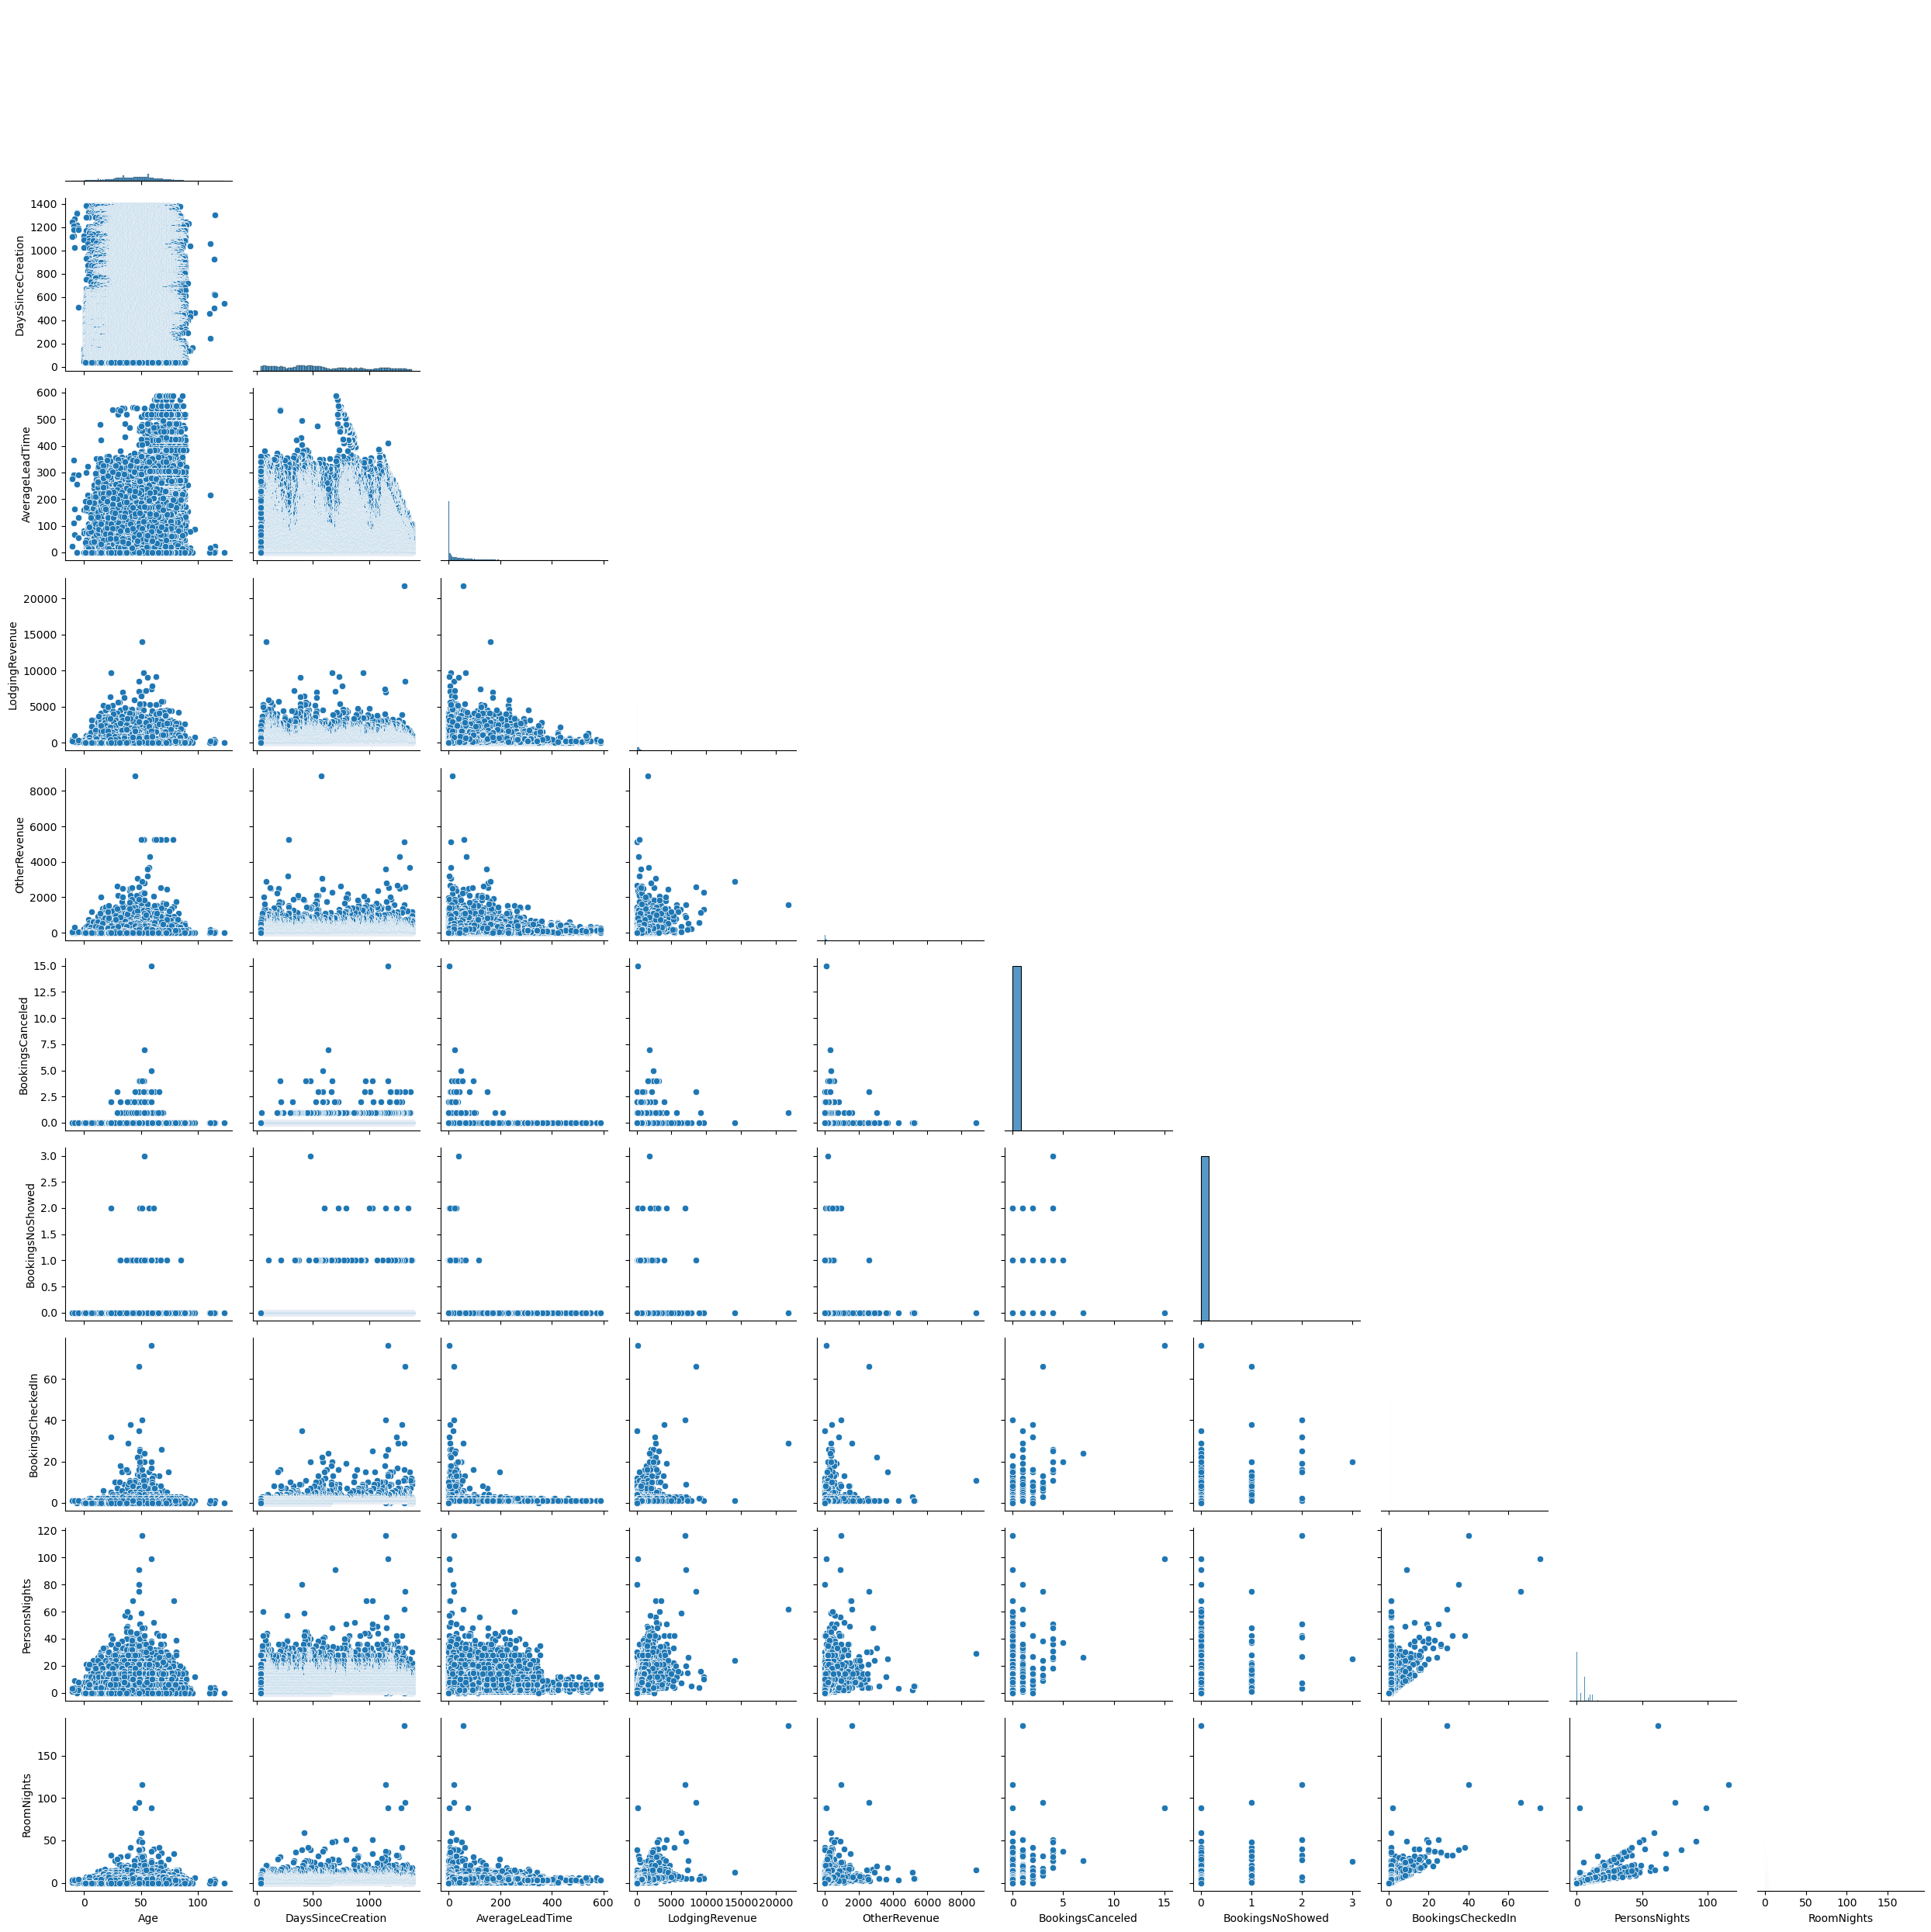

In [29]:
# Check relationships between variables with scatter plots 

# Setting pairplot
sns.pairplot(data[data_num.columns], diag_kind="hist", corner=True)

plt.subplots_adjust(top=0.95)
plt.tight_layout()
plt.show()

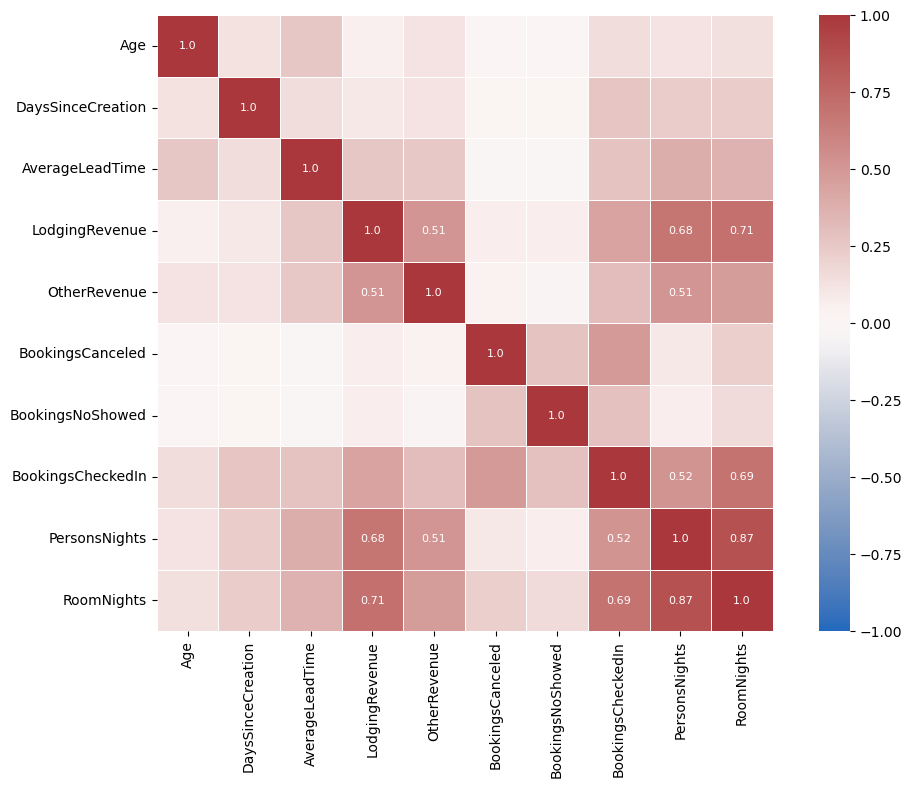

In [28]:
corr = data[data_num.columns].corr(method="pearson").round(2)
mask_annot = np.absolute(corr.values) >= 0.5
annot = np.where(mask_annot, corr.values, np.full(corr.shape,""))

fig = plt.figure(figsize=(12, 8))

sns.heatmap(data=corr, 
            annot=annot,
            fmt='s',
            vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5,
            cmap='vlag',
            annot_kws={"size": 8})

plt.show()

In [ ]:
# DaysSinceCreation and bookings? Are there any account creation with 0 bookings? 